# Importing

In [15]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [2]:
df = pd.read_csv("./Datasets/2021-07-14 dataset_all.csv")

In [3]:
len(df)

8448

In [4]:
df.country.nunique()

198

In [14]:
dfa = pd.read_csv("./Datasets/2021-07-16 data_africa.csv")

In [17]:
dfa.head()

,year,country,text,session,country_map,is_war,n_conflicts,total_deaths,incompatibility,intensity,type_of_conflict,conflict_before,no_tokens,countryname,continent,sentences,sentences_multiple_tokens
0,1970,CMR,: A year ago I came here as the Acting Preside...,25,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,2814,Cameroon,AF,"[['a', 'year', 'ago', 'i', 'came', 'here', 'as...","[['a', 'year', 'ago', 'i', 'came', 'here', 'as..."
1,1971,CMR,"186.\t Mr. President, on behalf of the delegat...",26,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,2712,Cameroon,AF,"[['mr', 'president', 'on', 'behalf', 'of', 'th...","[['mr', 'president', 'on', 'behalf', 'of', 'th..."
2,1972,CMR,"Mr. President, since I am speaking from this r...",27,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,3459,Cameroon,AF,"[['mr', 'president', 'since', 'i', 'am', 'spea...","[['mr', 'president', 'since', 'i', 'am', 'spea..."
3,1974,CMR,"For many years, from this rostrum and others,...",29,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,3086,Cameroon,AF,"[['for', 'many', 'years', 'from', 'this', 'ros...","[['for', 'many', 'years', 'from', 'this', 'ros..."
4,1975,CMR,"69.\t Mr. President, as 1 come to this rostrum...",30,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,4150,Cameroon,AF,"[['mr', 'president', 'as', 'come', 'to', 'this...","[['mr', 'president', 'as', 'come', 'to', 'this..."


In [22]:
dfa[dfa.text.map(lambda x: 'hatefully killed in such a cowardly way' in x)].text.iloc[0]

'The Head of State of the Transition, Her Excellency Ms. Catherine Samba Panza, was to have spoken to here at the General Assembly personally in order to thank the United Nations for its extremely valuable support to the process of transition in the Central African Republic. Alas, the resurgence of violence since 25 September in the capital, Bangui, has meant that she has had to return home earlier than intended. She has therefore asked me to give her speech as follows.\nIt is an honour and great pleasure for me to share with the General Assembly the vision that my country has on the major issues facing the world and to report on developments in the situation in the Central African Republic. The serious situation obtaining today in my country means that I must spare addressing international issues in order to call the attention of world leaders to the new tragedy affecting the people of the Central African Republic.\nI should like first of all sincerely to congratulate His Excellency M

In [15]:
len(dfa)

2426

In [16]:
df.country.nunique()

198

In [7]:
df

,year,country,text,session,country_map,is_war,n_conflicts,total_deaths,incompatibility,intensity,type_of_conflict,conflict_before,no_tokens,countryname,continent,sentences,sentences_multiple_tokens
0,1970,CMR,: A year ago I came here as the Acting Preside...,25,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,2814,Cameroon,AF,"[['a', 'year', 'ago', 'i', 'came', 'here', 'as...","[['a', 'year', 'ago', 'i', 'came', 'here', 'as..."
1,1971,CMR,"186.\t Mr. President, on behalf of the delegat...",26,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,2712,Cameroon,AF,"[['mr', 'president', 'on', 'behalf', 'of', 'th...","[['mr', 'president', 'on', 'behalf', 'of', 'th..."
2,1972,CMR,"Mr. President, since I am speaking from this r...",27,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,3459,Cameroon,AF,"[['mr', 'president', 'since', 'i', 'am', 'spea...","[['mr', 'president', 'since', 'i', 'am', 'spea..."
3,1974,CMR,"For many years, from this rostrum and others,...",29,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,3086,Cameroon,AF,"[['for', 'many', 'years', 'from', 'this', 'ros...","[['for', 'many', 'years', 'from', 'this', 'ros..."
4,1975,CMR,"69.\t Mr. President, as 1 come to this rostrum...",30,NaN,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,4150,Cameroon,AF,"[['mr', 'president', 'as', 'come', 'to', 'this...","[['mr', 'president', 'as', 'come', 'to', 'this..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421,2015,SSD,"On behalf of my President, His Excellency Mr. ...",70,SSD,True,1,493.0,Government,Conflict,Internationalized intrastate,Conflict before,1206,South Sudan,AF,"[['on', 'behalf', 'of', 'my', 'president', 'hi...","[['on', 'behalf', 'of', 'my', 'president', 'hi..."
2422,2016,SSD,I bring to the General Assembly greetings from...,71,SSD,True,1,735.0,Government,Conflict,Intrastate,Conflict before,1740,South Sudan,AF,"[['i', 'bring', 'to', 'the', 'general', 'assem...","[['i', 'bring', 'to', 'the', 'general assembly..."
2423,2017,SSD,I am honoured to deliver this statement on beh...,72,SSD,True,1,484.0,Government,Conflict,Intrastate,Conflict before,2356,South Sudan,AF,"[['i', 'am', 'honoured', 'to', 'deliver', 'thi...","[['i', 'am', 'honoured', 'to', 'deliver', 'thi..."
2424,2018,SSD,It is my great honour to deliver this statemen...,73,SSD,True,1,527.0,Government,Conflict,Intrastate,Conflict before,2392,South Sudan,AF,"[['it', 'is', 'my', 'great', 'honour', 'to', '...","[['it', 'is', 'my', 'great', 'honour', 'to', '..."


In [ ]:
df[dfdf.h]

## Importing arrays

In [557]:
stopwords = pd.read_csv('../Supplementary files/stopwords.txt', header=None)
stopwords = stopwords[0].tolist()

In [558]:
[x in stopwords for x in ['we', 'will', 'maintain', 'our']]

[True, True, False, True]

In [559]:
fpath = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\Datasets'

In [560]:
fpath = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\Datasets'
# Import
embed_arr = pd.read_pickle(fpath + r'\2021-07-22 embeddings_arrays_final.pickle')
index_vals = pd.read_pickle(fpath + r'\2021-07-22 index_values.pickle')
topic_vals = pd.read_pickle(fpath + r'\2021-07-22 sentences_words.pickle')

In [561]:
for i in [embed_arr, index_vals, topic_vals]:
    print("--------------")
    print("Keys:")
    print(list(i.keys())[:25])

--------------
Keys:
['embed', 'double', 'single', 'tfidf', 'index']
--------------
Keys:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
--------------
Keys:
['sentences', 'cond_probs', 'mi_score', 'topwords']


In [7]:
embed_arr['index']

array([   0,    0,    0, ..., 2425, 2425, 2425])

In [8]:
slabels = {}
for i in topic_vals['sentences'].keys():
    slabels[i] = set(topic_vals['sentences'][i])

In [9]:
kmeans_labels = []

In [10]:
for sent in tqdm(embed_arr['single']):
    for i in range(0, 28):
        if sent in slabels[i]:
            kmeans_labels.append(i)

100%|███████████████████████████████████████████████████████████████████████| 236880/236880 [00:06<00:00, 37894.92it/s]


In [11]:
len(kmeans_labels) == len(embed_arr['index'])

True

In [12]:
assert len(kmeans_labels) == len(embed_arr['single']) == len(embed_arr['embed']), 'The lengths of the bodies are not equal'

In [13]:
topic = 0

In [18]:
kmeans_labels = np.array(kmeans_labels)

## Extracting embeddings by topic

In [19]:
# Get embeddings by topic
embed_by_topic = {}
sentences_by_topic = {}
for topic in tqdm(range(0,28)):
    
    # Get filter condition
    filter_condition = (kmeans_labels == topic)
    
    # Get the sentences and embeddings
    embeds = np.array(embed_arr['embed'])[filter_condition]
    sentences = np.array(embed_arr['single'])[filter_condition]
    
    # Append
    embed_by_topic[topic] = embeds
    sentences_by_topic[topic] = sentences

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:51<00:00,  1.82s/it]


In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
def get_cosine_dist(i):
    # Calculate pairwise similarity for all elements
    cosine_sim = cosine_similarity(embed_by_topic[i])
    cos_df = pd.DataFrame(cosine_sim)
    
    sorted_cos = cos_df.mean(axis=1).sort_values(ascending=False)
    return sorted_cos

## Calculating the cosine distances and getting top-bottom sentences

In [22]:
cosine_dists = {}
for i in range(0,28):
    cosine_dists[i] = get_cosine_dist(i)

In [23]:
top_bottom_sents = {}

for i in range(0,27):
    top_sent_ind = cosine_dists[i].index.tolist()[:10]
    low_sent_ind = cosine_dists[i].index.tolist()[-10:]
    
    top_sent = sentences_by_topic[i][top_sent_ind]
    low_sent = sentences_by_topic[i][low_sent_ind]
    top_bottom_sents[i] = {'lowest': low_sent ,
                             'highest': top_sent}

In [16]:
topics = {
    1: 'Injustice',
    2: 'Development, UN assistance & response actions',
    3: 'Historical developments and change',
    4: 'Peace and prosperity',
    5: 'Independence and liberation struggle',
    6: 'Warfare & displacement',
    7: 'Miscellaneous',
    8: 'Arab & Israeli Conflicts',
    9: 'Personal Characteristics',
    10: 'The Economy',
    11: 'Greetings',
    12: 'Developmental statistics',
    13: 'Health, education, industrialization & environment',
    14: 'Cooperation & diplomacy',
    15: 'Call for action',
    16: 'Poverty & disease',
    17: 'Conflict & regional instability',
    18: 'African developmental policies',
    19: 'Rule of law',
    20: 'Inter-country relations',
    21: 'Apartheid & minority oppression',
    22: 'Foreword',
    23: 'Official gatherings',
    24: 'Gratitude',
    25: 'Nuclear weapons',
    26: 'Government declarations, reforms & elections',
    27: 'Future steps & challenges',
    28: 'Power dynamics'
}

In [154]:
# Create sentence dataframe
sents_tb_df = pd.DataFrame(top_bottom_sents).transpose()
sents_tb_df.to_excel("2021-07-23 reflective_sentences.xlsx")
sents_tb_df = sents_tb_df.reset_index()
sents_tb_df['index'] += 1

# Export merged df with topc names
sents_tb_df.merge(pd.DataFrame(pd.Series(topics)).reset_index(), left_on='index', right_on='index').to_excel("2021-07-23 reflective_sentences.xlsx")

In [298]:
top_bottom_sents[22]['lowest']

array(['a pv and corr l', 'no group is above or below another',
       'the cold war had ended', 'a annex i para', 'a hrc para',
       'no one here took part in the first general assembly in',
       'a pv para', 'sec a sect', 'a s pv', 'a s pv'], dtype='<U3314')

In [299]:
top_bottom_sents[21]['lowest']

array(['your election to this office mi', 'allow me at the outset',
       'with those few points i thank you very much ladies and gentlemen',
       'that was brilliant', 'i assure you', 'i assure you',
       'i assure you', 'at the outset',
       'i thank you and may god bless us all',
       'thank you and god bless you all'], dtype='<U3314')

Include: Average similarity to all the other points in the cluster. NOTE: some clusters are "stronger" than the otther ones, as can be seen by the cosine distribution. Particularly, the best cluster is cluster X, whereas the worst one is the cluster X, with an average cosine similarity of X and a standard deviation of X. 

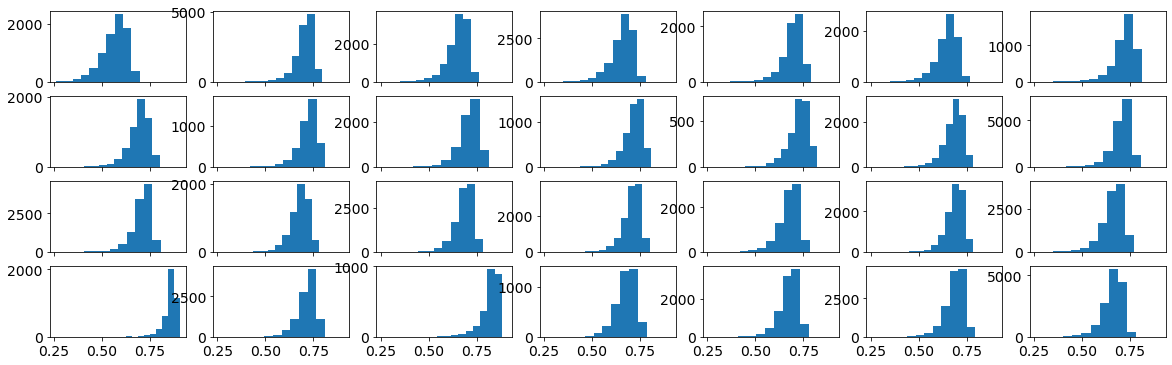

In [300]:
fig, axs = plt.subplots(4,7, figsize=(20,6), sharex=True)

axs_list = axs.flatten()

for i, ax in enumerate(axs_list):
    ax.hist(cosine_dists[i])

### Removing low valued- indices

In [25]:
cos_metrics = {}
for i in range(0,28):
    avg = np.mean(cosine_dists[i])
    std = np.std(cosine_dists[i])
    cos_metrics[i] = [avg, std]
    

Remove values that are two standard deviations away from the mean

In [26]:
sort_vals = pd.DataFrame(cos_metrics).transpose().sort_values(0, ascending=False).index.tolist()

In [157]:
from textwrap import wrap
import seaborn as sns

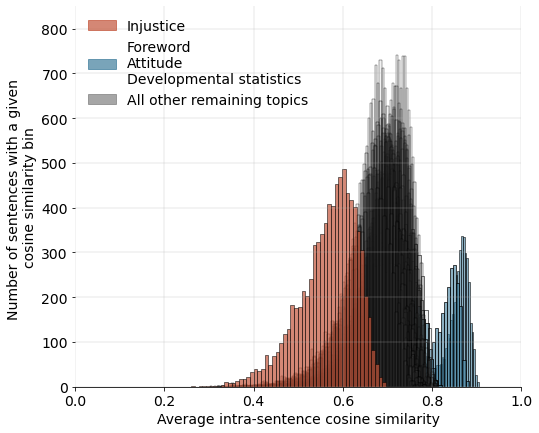

In [407]:
fig, axs = plt.subplots(1,1, figsize=(8,7))

for i, k in enumerate(sort_vals):
    
    if topics[k+1] == 'Injustice':
        sns.histplot(cosine_dists[k], alpha=0.7, ax=axs, kde=False, color=colorcodes[0])
    elif topics[k+1] in ['Foreword', 'Gratitude', 'Developmental statistics']:
        sns.histplot(cosine_dists[k], alpha=0.6, ax=axs, kde=False, color=colorcodes[-1])
    else:
        sns.histplot(cosine_dists[k], alpha=0.1, ax=axs, kde=False, color='grey')

axs.set_ylim((0,850))
axs.set_xlim((0,1))
axs.grid(linewidth=0.3)

# Create a legend
patch1 = mpatches.Patch(color=colorcodes[0], alpha=0.7, label='Injustice')
patch2 = mpatches.Patch(color=colorcodes[-1], alpha=0.7, label='Foreword\nAttitude\nDevelopmental statistics')
patch3 = mpatches.Patch(color='grey', alpha=0.7, label='All other remaining topics')


axs.legend(handles=[patch1, patch2, patch3], frameon=False, loc='upper left', 
            fancybox=False, shadow=False)

locs=['top', 'right', 'left']
for loc in locs: axs.spines[loc].set_visible(False)

axs.set_xlabel("Average intra-sentence cosine similarity")
axs.set_ylabel("Number of sentences with a given \ncosine similarity bin")
fig.savefig('./Figures/2021-07-28 cosine_similarities_dist.pdf')

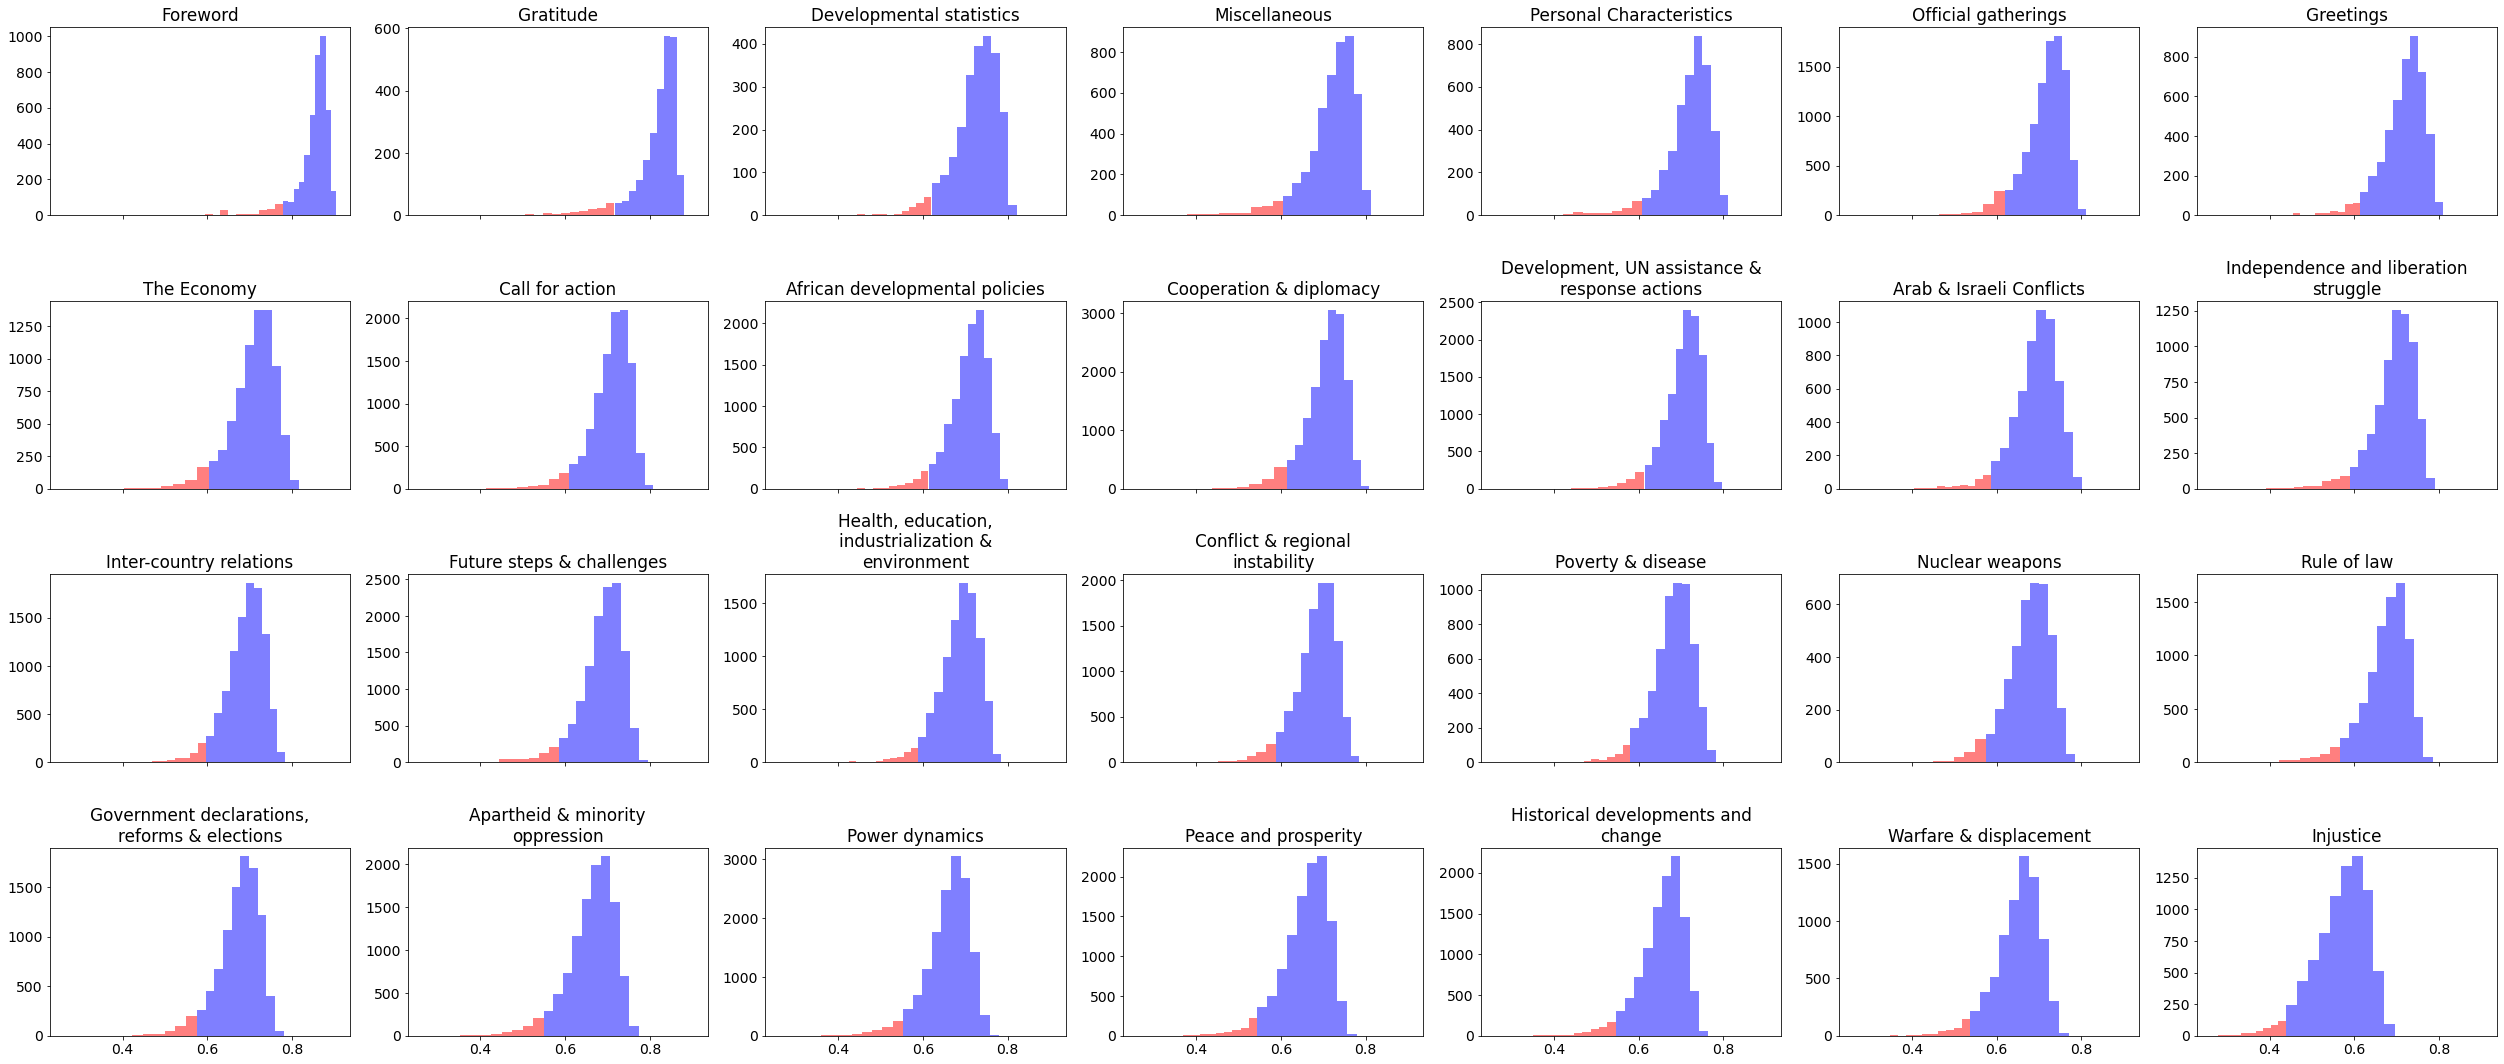

In [326]:
fig, axs = plt.subplots(4,7, figsize=(35,15), sharex=True)

axs_list = axs.flatten()

for i, ax in zip(sort_vals, axs_list):
    
    # Color values 
    avg, std = cos_metrics[i]
    color_vals = avg - 2 * std
    ax.hist(cosine_dists[i][cosine_dists[i] > color_vals], color='blue', alpha=0.5)
    ax.hist(cosine_dists[i][cosine_dists[i] <= color_vals], color='red', alpha=0.5)
    ax.set_title(("\n".join(wrap(topics[i+1], 30))))
    
plt.tight_layout()

Removing the values that are two standard deviations away from the mean significantly improves the interpretation of the topics

In [480]:
cosine_dists[0]

94      0.696895
7037    0.696831
2529    0.696601
712     0.694749
3375    0.692239
          ...   
5193    0.297719
1495    0.288923
2340    0.287492
4692    0.284038
2885    0.260135
Length: 8062, dtype: float64

In [27]:
ind_dict_single = {k:i for i, k in enumerate(embed_arr['single'])}

In [28]:
remove_ls = []
for i in range(28):
    avg, std = cos_metrics[i]
    color_vals = avg - 2 * std
    remove_indices_of_speech = cosine_dists[i][cosine_dists[i] <= color_vals].index.tolist()
    remove_strings_of_speech = set(sentences_by_topic[i][remove_indices_of_speech])
    inter = set(ind_dict_single).intersection(remove_strings_of_speech)
    indices_rm = [ind_dict_single[x] for x in inter]
    remove_ls += indices_rm

In [29]:
len(remove_ls)
remove_set = set(remove_ls)

In [30]:
print("Remove in total about % of the data because of the indices 2 standard deviations:")
print(len(remove_ls) / len(embed_arr['index']) * 100, '%')

Remove in total about % of the data because of the indices 2 standard deviations:
4.260385005065856 %


In [33]:
with open('./Datasets/2021-08-01 remove_kmeans_index.pickle', 'wb') as handle:
    pickle.dump(list(remove_set), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
indices_keep = [x for x in range(len(embed_arr['index'])) if x not in remove_set] # The number is here because I couldn't find which 

In [35]:
with open('./Datasets/2021-08-01 keep_kmeans_index.pickle', 'wb') as handle:
    pickle.dump(list(indices_keep), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [164]:
kmeans_labels_filtered = kmeans_labels[indices_keep]
embed_arr_filtered = embed_arr['index'][indices_keep]

In [165]:
index_dict_filtered = {}

for ind in tqdm(embed_arr_filtered):
    
    labels_use = kmeans_labels_filtered[(embed_arr_filtered == ind)]
    index_dict_filtered[ind] = labels_use

100%|███████████████████████████████████████████████████████████████████████| 226788/226788 [01:55<00:00, 1964.57it/s]


In [166]:
diffs = {}
for i in range(len(index_vals.keys())):
    perc = (len(index_vals[i]) - len(index_dict_filtered[i])) / len(index_vals[i]) 
    diffs[i] = perc

In [450]:
index_vals[5]

array([ 6,  8, 10, 21,  3, 22, 27,  8, 23, 26, 23, 19, 10, 18,  1,  2, 16,
        9,  2, 16,  2, 13, 24,  2, 24,  6, 19,  5,  4,  4,  4,  4, 20, 19,
       20, 19,  3, 16, 20, 14,  0, 20, 20,  4, 20,  5, 20,  5, 20,  4,  2,
        5,  5, 27,  3, 20, 27,  4, 20,  0, 19, 18,  0,  4, 20,  7, 18, 20,
       19,  4, 16,  2, 16,  7,  5, 26, 19,  7,  7, 14, 16, 19,  1, 14, 16,
        5, 18, 16, 19, 14,  7, 16, 27, 27,  0, 27, 26,  3,  3, 22, 24,  2,
       24, 19, 12, 25, 12, 11, 11, 16, 27, 27,  0, 13, 22, 17, 17,  9,  2,
       17, 14,  2, 22, 17, 18, 22, 14, 13,  3, 26,  9, 11, 26, 22, 22,  2,
       22, 13, 27, 18, 15, 27, 27, 13, 13, 12,  2, 27, 18,  1,  1,  1, 13,
       13, 17,  2, 26, 26,  1, 13, 13, 13, 27, 27,  3])

Plot showcasing which indices were removed from where. Otherwise, more or less about 5% of words removed. Percent of the speeches removed

In [541]:
pd.Series(diffs).to_csv("./Datasets/2021-07-23 removed_indices.csv")

<AxesSubplot:>

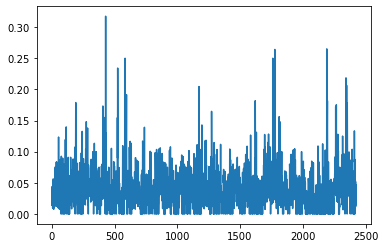

In [537]:
pd.Series(diffs).plot()

Generally, this removed sentences, such as: "we must walk the walk, not just talk the talk. Why did that occur. But it will not be so much longer."

In [363]:
print("Example sentences that are removed include: ")
sentences_by_topic[0][remove_indices]

Example sentences that are removed include: 


array(['we must walk the walk not just talk the talk',
       'this is a major task which it will not be easy to carry out',
       'we ignore them at our own risk', 'a page has been turned',
       'the decision however should be theirs and not ours',
       'let us be honest',
       'such is the unbelievable system of justice in south africa',
       'but we are not disheartened',
       'we should give them free of charge and not sell them',
       'in south africa we are still seeing a clash between two worlds',
       'hypocrisy has become accommodating',
       'it would mean that the united nations is nothing and is insignificant',
       'we believe that roads are made by the feet that walk on them',
       'in such circumstances what is our choice',
       'but in africa and the middle east in asia and in latin america one hears an outcry the outcry of the oppressed peoples of the world as they fight their oppressors the outcry of the exploited against the exploiters the outc

# Constructing an index

In [167]:
dict_new = {}
for ind_, arr in index_dict_filtered.items():
    dict_new[ind_] = pd.Series(arr).value_counts(normalize=True)

In [168]:
index_df = pd.DataFrame(dict_new).transpose().fillna(0)

In [169]:
index_df.columns = [x for x in range(1,29)]

### Lengths of the speeches

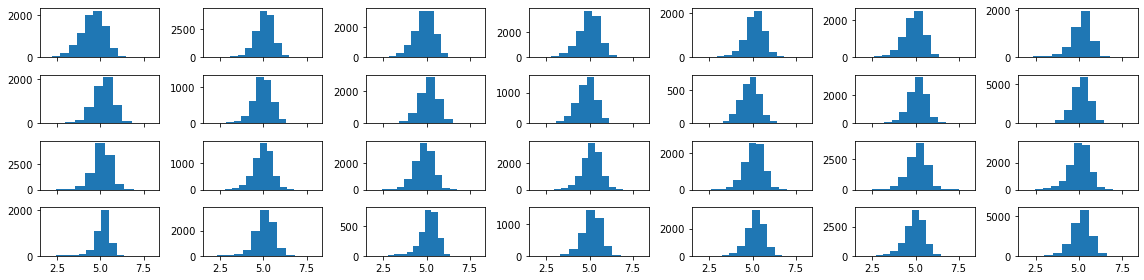

In [170]:
fig, axs = plt.subplots(4,7, figsize=(16,4), sharex=True)
axs_list = axs.flatten()

for i, col in enumerate(index_df.columns):
    lengths = np.log(np.array([len(x) for x in topic_vals['sentences'][i]]))
    axs_list[i].hist(lengths)
    
    
plt.tight_layout()

# Exploring what the topics mean

In [171]:
top_df = pd.DataFrame(topic_vals['topwords'])

In [172]:
top_df.columns = [x+1 for x in top_df.columns]

In [5]:
topics = {
    1: 'Injustice',
    2: 'Development, UN assistance & response actions',
    3: 'Historical developments and change',
    4: 'Peace and prosperity',
    5: 'Independence and liberation struggle',
    6: 'Warfare & displacement',
    7: 'Miscellaneous',
    8: 'Arab & Israeli Conflicts',
    9: 'Personal Characteristics',
    10: 'The Economy',
    11: 'Greetings',
    12: 'Developmental statistics',
    13: 'Health, education, industrialization & environment',
    14: 'Cooperation & diplomacy',
    15: 'Call for action',
    16: 'Poverty & disease',
    17: 'Conflict & regional instability',
    18: 'African developmental policies',
    19: 'Rule of law',
    20: 'Inter-country relations',
    21: 'Apartheid & minority oppression',
    22: 'Foreword',
    23: 'Official gatherings',
    24: 'Gratitude',
    25: 'Nuclear weapons',
    26: 'Government declarations, reforms & elections',
    27: 'Future steps & challenges',
    28: 'Power dynamics'
}

In [141]:
topics_notuse = [7,11,22,23,24]
topics_notuse_ls = [topics[x] for x in topics_notuse]

In [533]:
topics_notuse_ls

['Miscellaneous', 'Greetings', 'Foreword', 'Official gatherings', 'Gratitude']

In [120]:
topics_use = [k for k,v in topics.items() if k not in topics_notuse]

In [123]:
topics_use_ls = [topics[k] for k in topics_use]

In [136]:
number2topic = {'T' + str(i+1):k for i, k in enumerate(topics_use_ls)}

In [139]:
topic2number = {v:k for k,v in number2topic.items()}

## Plotting index distribution

In [29]:
indices_plot = index_df.mean(axis=0).sort_values(ascending=False).index.tolist()

In [59]:
avgs = index_df.mean(axis=0).round(4)
stds = index_df.std(axis=0).round(4)

In [37]:
from textwrap import wrap


In [27]:
index_df = pd.read_csv("./Datasets/2021-07-30 index_df.csv")
index_df = index_df.drop('Unnamed: 0', axis=1)

In [18]:
import matplotlib
import seaborn as sns

In [28]:
index_df.columns = topics.values()

In [33]:
topics['Cooperation & diplomacy']

KeyError: 'Cooperation & diplomacy'

In [35]:
topics2 = {v:k for k,v in topics.items()}

In [44]:
matplotlib.rcParams.update({'font.size': 16})


In [ ]:
# place a text box in upper left in axes coords
ax.text(0.05, 0.90, textstr, transform=ax.transAxes, fontsize=fsize,
        verticalalignment='top', bbox=props)


In [56]:
colorcodes = ['#C3553A', '#D79787', '#B6CBD6', '#407E9C']

In [57]:
props = dict(boxstyle='round', facecolor=colorcodes[-2], alpha=0.5)
colorcodes = ['#C3553A', '#D79787', '#B6CBD6', '#407E9C']

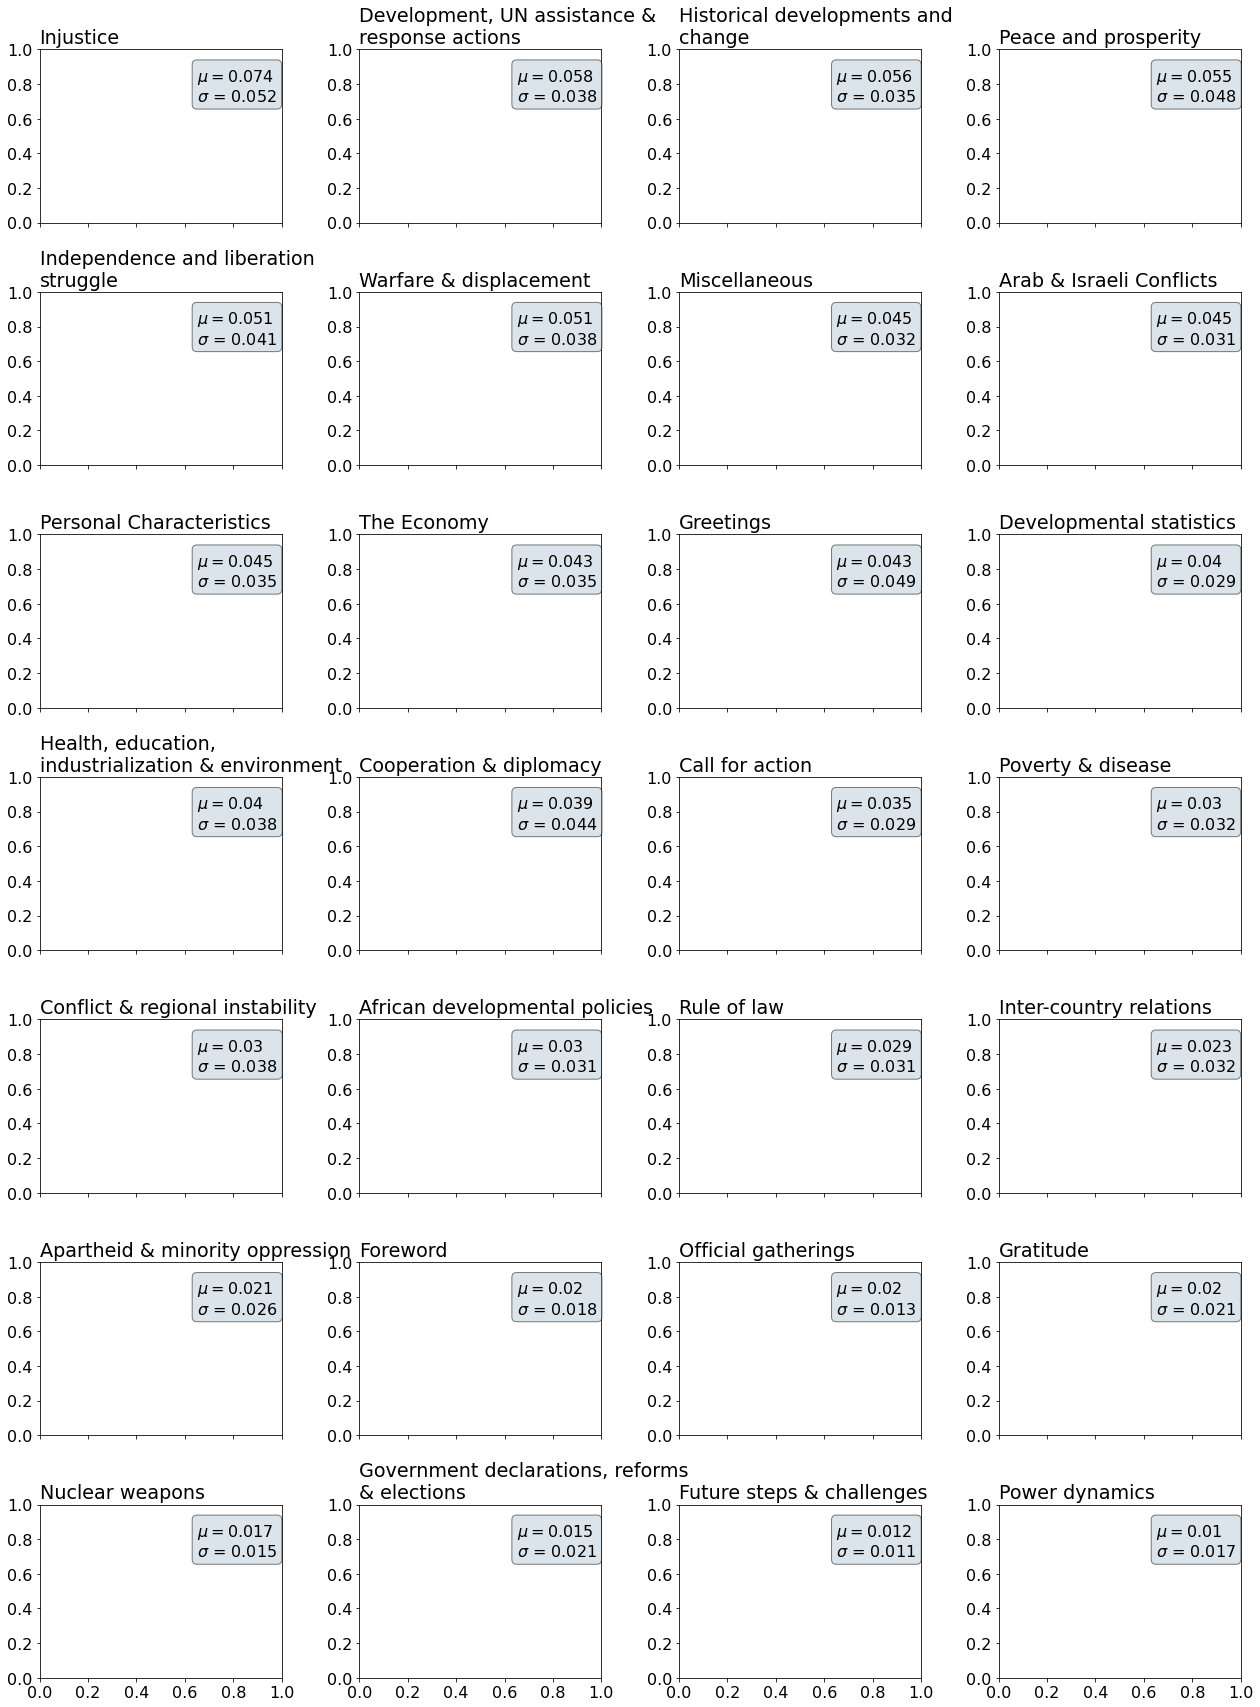

In [68]:
fig, axs = plt.subplots(7,4, figsize=(18,24), sharex=True)
axs_list = axs.flatten()
matplotlib.rcParams.update({'font.size': 16})

for i, col in enumerate(indices_plot):
    #sns.histplot(index_df[col], ax=axs_list[i])
    axs_list[i].set_title("\n".join(wrap(topics[i+1], 33)), loc='left')
    #if i % 4 == 0: axs_list[i].set_ylabel("Count")
    #else: axs_list[i].set_ylabel("")
    #if i in [24, 25, 26, 27, 28]: axs_list[i].set_xlabel("Index value")
    #else: axs_list[i].set_xlabel("")
    
    # Gt information on averages
    avg = avgs.loc[col]
    std = stds.loc[col]
    textstr = f"$\mu = {np.round(avg,3)}$\n$\sigma$ = {np.round(std,3)}"
    
        # place a text box in upper left in axes coords
    axs_list[i].text(0.65, 0.9, textstr, transform=axs_list[i].transAxes, fontsize=16,
            verticalalignment='top', bbox=props)

    # Plot the averages
    #axs_list[i].text(0.4, 200, textstr, transform=ax.transAxes, fontsize=fsize,
     #       verticalalignment='top')

#locs=['top', 'right']
#for ax in axs_list: 
#    for loc in locs: ax.spines[loc].set_visible(False)
        
plt.tight_layout()
#fig.savefig('./Figures/2021-07-28 index_values.pdf')

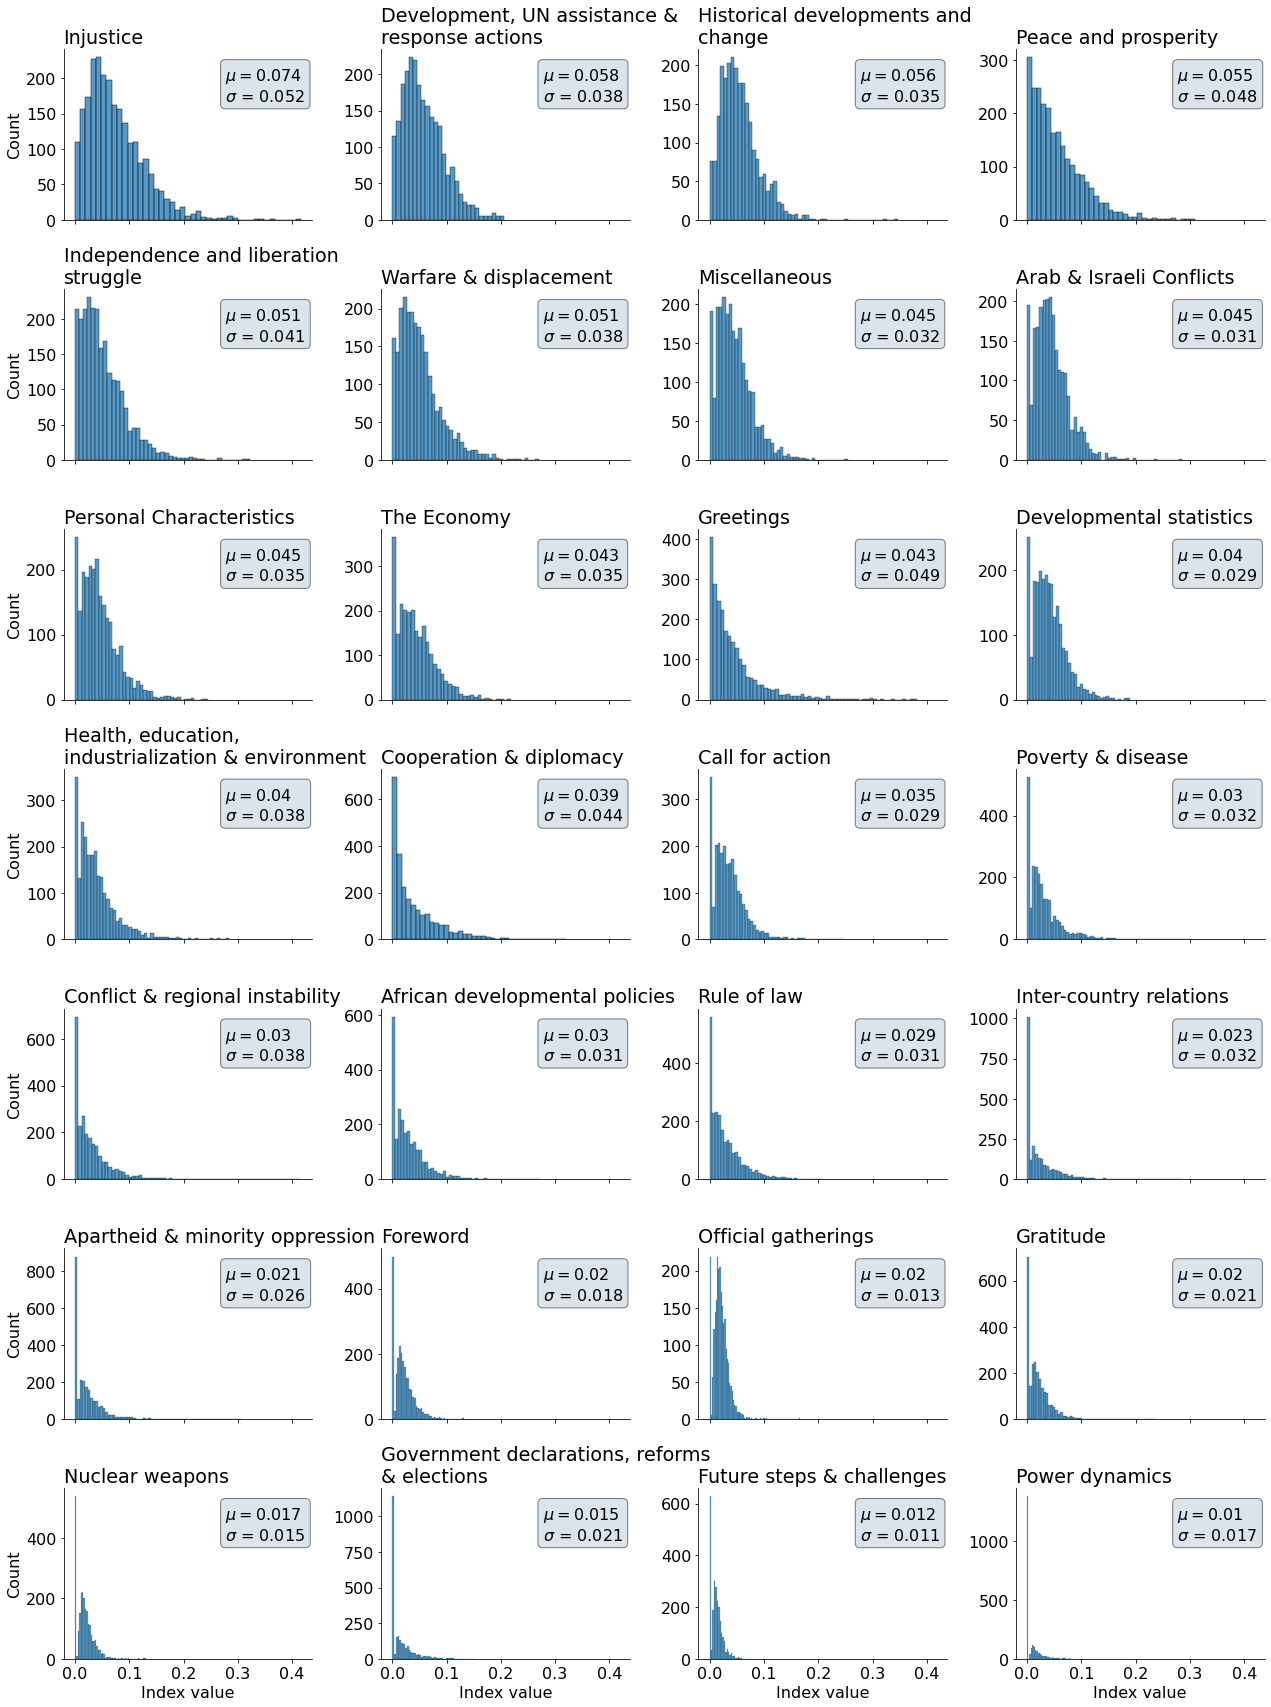

In [70]:
fig, axs = plt.subplots(7,4, figsize=(18,24), sharex=True)
axs_list = axs.flatten()
matplotlib.rcParams.update({'font.size': 16})

for i, col in enumerate(indices_plot):
    sns.histplot(index_df[col], ax=axs_list[i])
    axs_list[i].set_title("\n".join(wrap(topics[i+1], 33)), loc='left')
    if i % 4 == 0: axs_list[i].set_ylabel("Count")
    else: axs_list[i].set_ylabel("")
    if i in [24, 25, 26, 27, 28]: axs_list[i].set_xlabel("Index value")
    else: axs_list[i].set_xlabel("")
    
    # Gt information on averages
    avg = avgs.loc[col]
    std = stds.loc[col]
    
    # Plot the averages
    textstr = f"$\mu = {np.round(avg,3)}$\n$\sigma$ = {np.round(std,3)}"
    
        # place a text box in upper left in axes coords
    axs_list[i].text(0.65, 0.9, textstr, transform=axs_list[i].transAxes, fontsize=16,
            verticalalignment='top', bbox=props)


locs=['top', 'right']
for ax in axs_list: 
    for loc in locs: ax.spines[loc].set_visible(False)
        
plt.tight_layout()
fig.savefig('./Figures/2021-07-28 index_values.pdf')

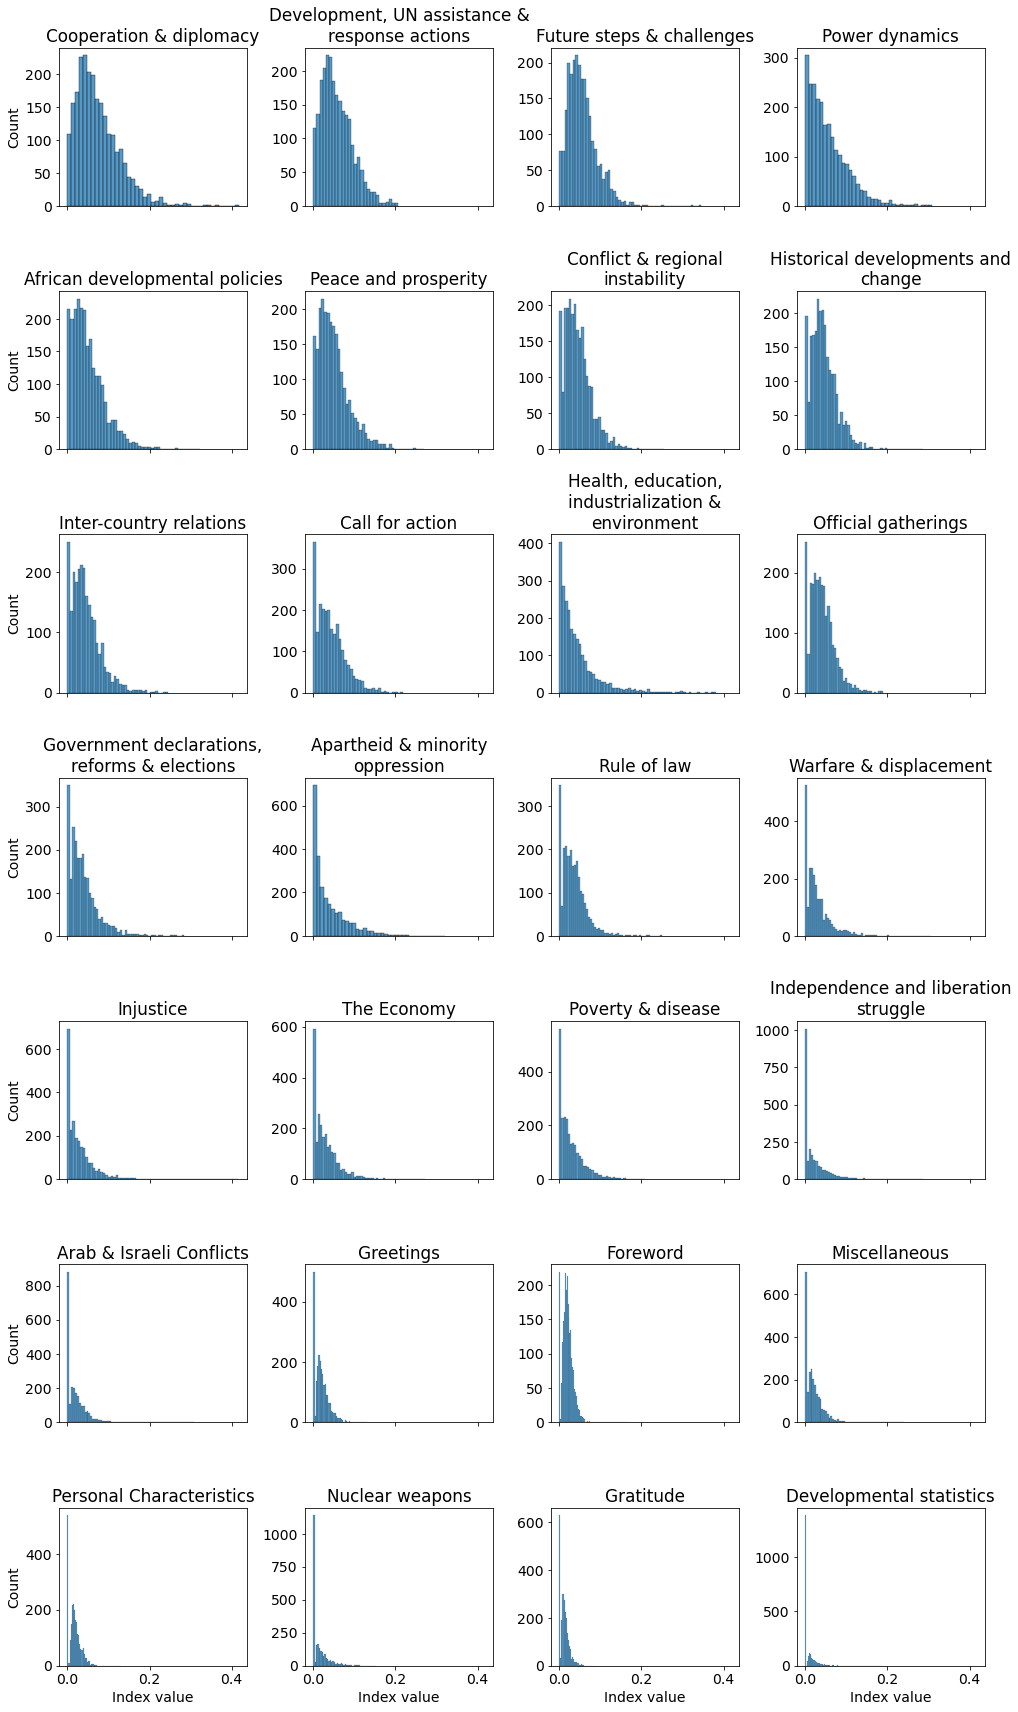

In [502]:
fig, axs = plt.subplots(7,4, figsize=(14,24), sharex=True)
axs_list = axs.flatten()
matplotlib.rcParams.update({'font.size': 14})

for i, col in enumerate(indices_plot):
    sns.histplot(index_df[col], ax=axs_list[i])
    axs_list[i].set_title("\n".join(wrap(topics[col], 30)))
    if i % 4 == 0: axs_list[i].set_ylabel("Count")
    else: axs_list[i].set_ylabel("")
    if i in [24, 25, 26, 27, 28]: axs_list[i].set_xlabel("Index value")
    else: axs_list[i].set_xlabel("")
    
    # Gt information on averages
    avg = avgs.loc[col]
    std = stds.loc[col]
    textstr = f"$\mu = {avg}$\n$\sigma$ = {std}"
    
    # Plot the averages
    #axs_list[i].text(0.4, 200, textstr, transform=ax.transAxes, fontsize=fsize,
     #       verticalalignment='top')

plt.tight_layout()
fig.savefig('./Figures/2021-07-28 index_values.pdf')

Insight: Clustering sentences gave much more insight than the top words based on MI. I could re-adjust the topics. (!)

In [335]:
for i in range(0,28):
    print(f"Topic: {i+1}. {topics[i+1]}")
    print('----------------')
    print(random.sample(topic_vals['sentences'][i], 10))
    print('----------------')


Topic: 1. Injustice
----------------
['from the new dawn of relations in the middle east emerges a powerful compelling and inspiring truth that there is no conflict that is not capable of solution', 'we wish to warn against the trend in international gatherings not to go beyond mere idle and theoretical discussions in regard to development', 'the echo of the church as carried by the missionaries of africa will be considered much more helpful and healthy than the voice of other congregations that have yielded to the portuguese dictatorship and become as clay in their hands', 'zaire is well qualified to say this', 'who is to blame for this', 'when we talk of terrorism we should know our subject', 'again and again they report that yet another appeal has been made to the mighty and the lowly alike voluntarily to respond to the cries of the wretched of the earth', 'here i wish to appeal that we correct our mistakes mobilize our forces and spirits you and we the arab states to get a second w

In [408]:
# Top words
print("Top words")
display(top_df)

Top words


,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,let,support,years,future,struggle,innocent,president,palestinian,qualities,debt,...,charter,republic,regime,session,conference,secretary,nuclear,elections,challenges,interests
1,say,community,past,peace,people,thousands,minister,israel,experience,countries,...,principles,congo,apartheid,mr,held,general,weapons,council,problems,power
2,truth,assistance,century,world,independence,children,chairman,occupied,success,prices,...,respect,democratic,racist,election,summit,annan,treaty,government,facing,certain
3,words,partners,developments,generations,liberation,lives,prime,arab,confident,developing,...,principle,somalia,south,assembly,meeting,kofi,arms,permanent,solutions,influence
4,know,appeal,events,mankind,freedom,victims,king,territories,diplomatic,trade,...,law,sudan,pretoria,predecessor,heads,moon,disarmament,constitution,issues,ideological
5,did,organizations,progress,better,peoples,refugees,head,palestine,personal,burden,...,nations,chad,aggression,congratulations,year,tribute,proliferation,court,address,confrontation
6,does,member,ago,prosperity,swapo,hundreds,majesty,israeli,statesman,economies,...,integrity,angola,africa,congratulate,anniversary,pay,weapon,electoral,face,political
7,facts,agencies,changes,justice,namibia,displaced,leader,right,skills,export,...,purposes,country,acts,sir,adopted,waldheim,destruction,constitutional,global,powerful
8,think,continue,history,live,zimbabwe,civilians,el,jerusalem,successful,markets,...,territorial,liberia,minority,like,declaration,kurt,chemical,commission,complex,narrow
9,speak,contribution,results,dignity,victory,millions,mandela,inalienable,discharge,products,...,fundamental,union,illegal,behalf,special,organization,mass,transitional,urgent,blocs


In [182]:
top_df.columns = [topics[c] for c in top_df.columns]

In [183]:
top_df = top_df.transpose()

In [184]:
top_df = top_df.iloc[:, :10]

In [185]:
top_df.columns = range(1,11)

In [186]:
dict_export = {}

for col in top_df.columns:
    dict_export[col] = []
    for word in top_df[col]:
        dict_export[col].append(word)

In [187]:
index_df.columns = [topics[x] for x in index_df.columns]

In [189]:
index_df.to_csv("./Datasets/2021-07-30 index_df.csv")

### Merging with DFA

In [3]:
# Import the main df and the indices
dfa = pd.read_csv('./Datasets/2021-07-19 embedding_df.csv')
index_df = pd.read_csv("./Datasets/2021-07-30 index_df.csv")
index_df = index_df.drop('Unnamed: 0', axis=1)
dfa = dfa.drop('Unnamed: 0', axis=1)

In [5]:
k = pd.read_pickle('./Datasets/2021-07-22 sentences_words.pickle')

In [563]:
dfa.columns

Index(['year', 'country', 'text', 'session', 'country_map', 'is_war',
       'n_conflicts', 'total_deaths', 'incompatibility', 'intensity',
       'type_of_conflict', 'conflict_before', 'no_tokens', 'countryname',
       'continent', 'sentences', 'sentences_multiple_tokens', 'text_clean',
       'sentences_full', 'embeddings_sbert'],
      dtype='object')

In [564]:
usecols = ['year', 'country', 'is_war', 'n_conflicts', 'total_deaths', 'incompatibility', 'intensity', 'type_of_conflict',
          'conflict_before', 'countryname']
new_df = dfa[usecols].merge(index_df, how='inner', left_index=True, right_index=True)

In [565]:
new_df['intrastate_conflict'] = new_df.type_of_conflict.isin(['Intrastate', 'Internationalized intrastate']).astype(int)
new_df['interstate_conflict'] = new_df.type_of_conflict.isin(['Intrastate', 'Multiple conflicts']).astype(int)
new_df['is_war'] = new_df.is_war.astype(int)

Test whether the distributions are the same or different (for the indices for countries at war or not). The Kolmogorov-Smirnov test


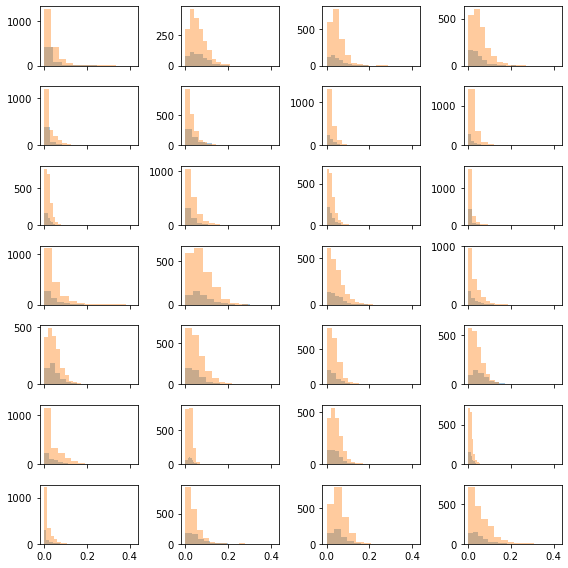

In [569]:
fig, axs = plt.subplots(7,4, figsize=(8,8), sharex=True)
axs_list = axs.flatten()

for i, col in enumerate(index_df.columns):
    axs_list[i].hist(new_df[new_df.is_war==True][col], alpha=0.4)
    axs_list[i].hist(new_df[new_df.is_war==False][col], alpha=0.4)

    
plt.tight_layout()

### Exploring Socio-economic dataset

In [566]:
sdata = pd.read_excel('./Datasets/socioeconomic data/merged_data.xlsx')

In [567]:
sdata2 = pd.read_excel('./Datasets/gretlready2-but-with-ODA.xlsx')

In [568]:
dropcols = [k for k,v in dict(sdata.isnull().mean()).items() if v > 0.6]
dropcols += ['AC_incidence']
print(f"Dropcols: {dropcols}")

Dropcols: ['AC_intensity', 'Freedom', 'AC_incidence']


In [569]:
sdata = sdata.drop(dropcols, axis=1)

In [570]:
sdata = sdata.merge(sdata2[['Country', 'Year', 'Population']], on=['Country', 'Year'])

The difference between the controls: Institutions & Ruggedness

In [571]:
sdata.head()

,Country,Year,ForeignAid/GNI,"Resources, %GDP",EthFrac,LingFrac,RelFrac,Transitional,AC_neighbour,GDP/capita,Population
0,Angola,1960,NaN,NaN,0.79,0.79,0.63,0,1,NaN,5643182.00
1,Angola,1961,NaN,NaN,0.79,0.79,0.63,0,1,NaN,5753024.00
2,Angola,1962,NaN,NaN,0.79,0.79,0.63,0,1,NaN,5866061.00
3,Angola,1963,NaN,NaN,0.79,0.79,0.63,0,0,NaN,5980417.00
4,Angola,1964,NaN,NaN,0.79,0.79,0.63,0,1,NaN,6093321.00


In [572]:
sdata.columns

Index(['Country', 'Year', 'ForeignAid/GNI', 'Resources, %GDP', 'EthFrac',
       'LingFrac', 'RelFrac', 'Transitional', 'AC_neighbour', 'GDP/capita',
       'Population'],
      dtype='object')

In [573]:
cols = ['Country', 'Year', 'ForeignAid', 'Resources', 'EthFrac', 'LingFrac',
                 'RelFrac', 'Transitional', 'AC_neighbour', 'GDP_capita', 'Population']

In [574]:
sdata.columns = cols

In [575]:
sdata['Population_log'] = np.log(sdata['Population'])
sdata['GDP_capita_log'] = np.log(sdata['GDP_capita'])
sdata['ForeignAid_log'] = np.log(sdata['ForeignAid'] + 0.00001)

In [576]:
cols_replace = ['Population', 'GDP_capita', 'ForeignAid']
newcols =  [x+'_log' if x in cols_replace else x for x in cols[2:]]

I do not transform foreign aid and resources due to their clear interpretation as variables (with %)

<AxesSubplot:>

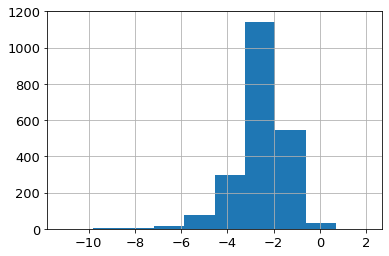

In [577]:
sdata['ForeignAid_log'].hist()

In [578]:
sdata['ForeignAid'].max()

7.598434840340306

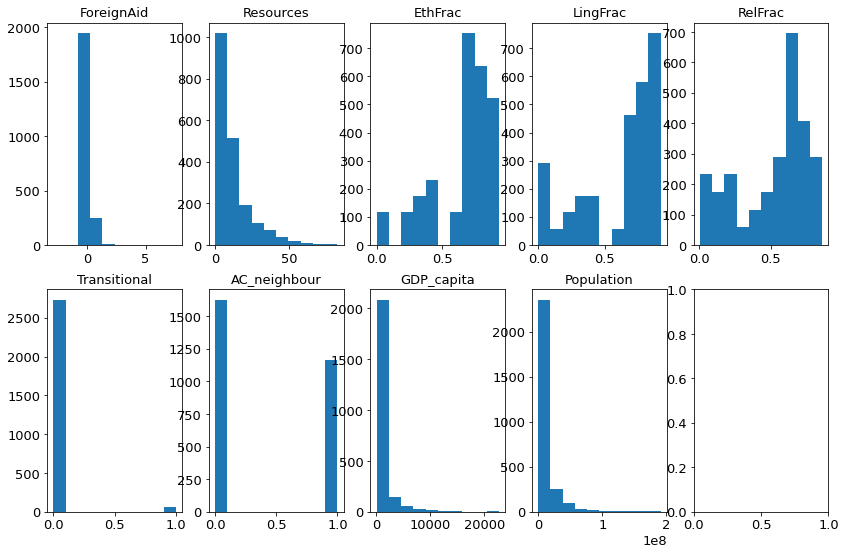

In [579]:
fig, axs = plt.subplots(2,5, figsize=(14,9))
axs_list = axs.flatten()
for i, col in enumerate(cols[2:]):
    axs_list[i].hist(sdata[col])
    axs_list[i].set_title(col)

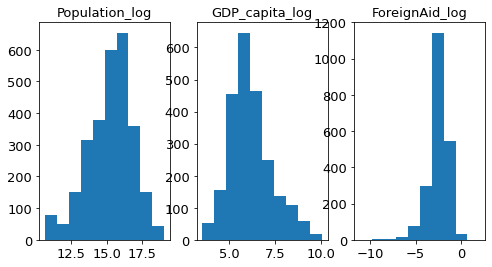

In [580]:
fig, axs = plt.subplots(1,3, figsize=(8,4))
axs_list = axs.flatten()
for i, col in enumerate(['Population_log', 'GDP_capita_log', 'ForeignAid_log']):
    axs_list[i].hist(sdata[col])
    axs_list[i].set_title(col)

### Multicolinearity

In [581]:
corr_df_ext = sdata[newcols].corr()

In [582]:
cmap = sns.diverging_palette(20,230, as_cmap=True)

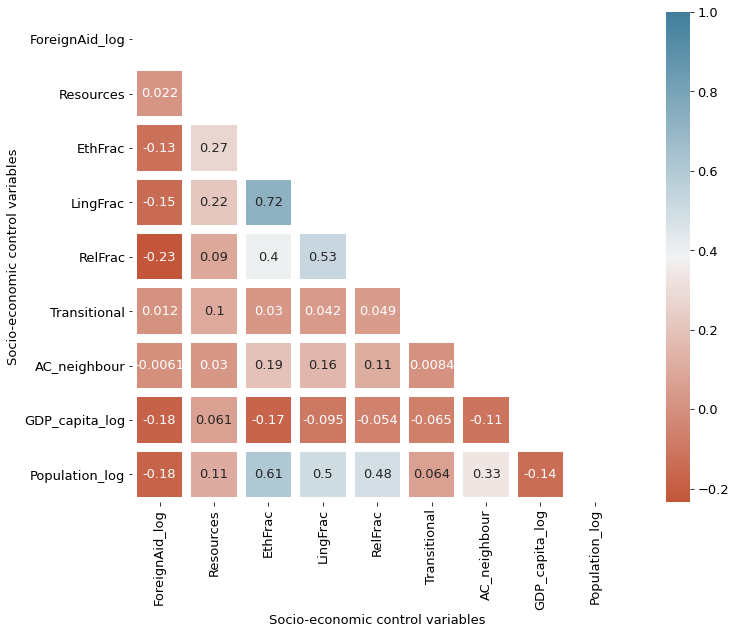

In [590]:
mask = np.zeros_like(corr_df_ext)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(13,9))
sns.heatmap(corr_df_ext, linewidth=8, ax=ax, cmap=cmap, mask=mask, square=True, annot=True, vmax=1)
#ax.set_title("Correlation coefficient between socio-economic variables", loc='left')
ax.set_xlabel("Socio-economic control variables")
ax.set_ylabel("Socio-economic control variables")

plt.tight_layout()

fig.savefig('./Figures/2021-08-09 corr_coef.pdf')

### Merging datasets

In [76]:
mapping = {'Congo, Dem. Rep.': 'DR Congo',
           'Congo, Rep.': 'Congo Republic',
           "Cote D'Ivoire": "Cote d'Ivoire",
          'Gambia, The': 'Gambia'}

In [77]:
sdata['Country'] = sdata.Country.map(lambda x: mapping.get(x,x))

In [78]:
for i in sdata.Country.unique():
    if i not in new_df.countryname.unique():
        print(i)

In [79]:
for i in new_df.countryname.unique():
    if i not in sdata.Country.unique():
        print(i)

Algeria
Libya
Morocco
Tunisia
Egypt
Djibouti


### Updated script: 2021-08-07

In [165]:
new_df2 = new_df.merge(sdata, how='left', left_on=['countryname', 'year'], right_on=['Country', 'Year'])

In [166]:
def confl_func(x):
    if x < 25:
        return "No conflict"
    elif x < 1000:
        return "Conflict"
    elif x >= 1000:
        return "War"
    else:
        raise ValueError

In [167]:
new_df2['conflict_type'] = new_df2.total_deaths.map(confl_func)

In [172]:
number2topic['T19']

'Apartheid & minority oppression'

In [168]:
new_df2 = new_df2.drop(topics_notuse_ls, axis=1)
new_df2.columns = [topic2number.get(x, x) for x in new_df2.columns]

In [169]:
new_df2_dropna = new_df2.dropna()

In [170]:
new_df2.to_csv("./Datasets/2021-08-07 new_df2.csv", index=False)
new_df2_dropna.to_csv("./Datasets/2021-08-07 new_df2_dropna.csv", index=False)


In [176]:
# Extracting speakers by session
speakers = pd.read_excel(r"C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Raw Data UN\Speakers_by_session.xlsx")

In [181]:
len(new_df2)

2426

In [183]:
new_df2 = new_df2.merge(speakers, left_on=['country', 'year'], right_on=['ISO Code', 'Year'], how='left')

In [312]:
new_df3 = new_df2.copy()

In [313]:
for countryname in new_df3.countryname.unique():
    
    # Get speaker list
    speakers_list = new_df2[new_df3.countryname == countryname].sort_values('year', ascending=True)['Name of Person Speaking'].tolist()
    
    # Get clean words
    clean_words = [clean(str(x)) for x in speakers_list]
    
    # Modify
    modified_list = modify_list(clean_words)
    
    # Add modified
    new_df3.loc[new_df3.countryname==countryname, 'Name of Person Speaking'] = modified_list

In [316]:
new_df3['Name of Person Speaking'].value_counts()[:15]

nan                              65
seyoum mesfin                    12
king mswati iii                  11
jakaya mrisho kikwete            10
paul kagame                      10
pakalitha bethuel mosisili        9
robert mugabe                     9
bongo                             9
farah                             9
yoweri kaguta museveni            9
barre                             9
osman mohammed saleh              8
da luz                            8
teodoro obiang nguema mbasogo     8
hifikepunye pohamba               8
Name: Name of Person Speaking, dtype: int64

In [322]:
new_df3 = new_df3.rename(columns={'Name of Person Speaking': 'person'})

In [323]:
new_df2 = new_df3.copy()

In [324]:
new_df2.to_csv("./Datasets/2021-08-07 new_df2.csv", index=False)
new_df2_dropna.to_csv("./Datasets/2021-08-07 new_df2_dropna.csv", index=False)


In [325]:
from sklearn.preprocessing import QuantileTransformer

In [361]:
qt = QuantileTransformer(output_distribution='normal')

In [367]:
from sklearn.preprocessing import power_transform

In [368]:
power_transform(new_df2[list(number2topic.keys())])

array([[-0.33860652, -0.78607868,  1.8361537 , ..., -0.75809301,
         0.19686766,  1.60444583],
       [ 1.83789941, -1.0195693 ,  2.40348471, ..., -0.91481754,
        -1.08285047,  1.08431225],
       [-0.06469836, -0.74080795,  1.14148876, ..., -0.49712264,
        -0.03903092,  0.32966626],
       ...,
       [-0.43175487,  1.90503014,  1.32658144, ...,  0.57510482,
        -1.53201159, -0.23549303],
       [ 1.13008016,  1.98923055,  0.07223282, ...,  1.97131855,
        -0.81731118, -0.50625395],
       [-1.20364974,  0.01633219, -0.55120191, ...,  1.63555555,
        -2.17922386, -1.56372859]])

In [370]:
def transform_data_quantile(new_df2):
    new_df_quant = new_df2.copy()
    transf = pd.DataFrame(qt.fit_transform(new_df2[list(number2topic.keys())]))
    transf.columns = list(number2topic.keys())
    new_df_quant.loc[:, list(number2topic.keys())] = transf
    return new_df_quant

In [378]:
def transform_data_boxcox(new_df2):
    new_df_quant = new_df2.copy()
    transf = pd.DataFrame(power_transform(new_df2[list(number2topic.keys())], method='yeo-johnson'))
    transf.columns = list(number2topic.keys())
    new_df_quant.loc[:, list(number2topic.keys())] = transf
    return new_df_quant

In [379]:
new_df_quant2 = transform_data_boxcox(new_df2)

In [362]:
new_df_quant = new_df2.copy()

In [363]:
transf = pd.DataFrame(qt.fit_transform(new_df2[list(number2topic.keys())]))
transf.columns = list(number2topic.keys())

In [364]:
new_df_quant.loc[:, list(number2topic.keys())] = transf

<AxesSubplot:>

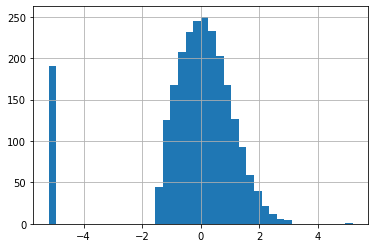

In [365]:
new_df_quant['T15'].hist(bins=40)

In [366]:
new_df_quant.to_csv("./Datasets/2021-08-07 new_df_quant.csv", index=False)

In [383]:
new_df_quant2.to_csv("./Datasets/2021-08-07 new_df_quant2.csv", index=False)

In [218]:
import re
from difflib import get_close_matches

In [309]:
import numpy as np

# Define function to clean text
def clean(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    text = ' '.join([w.lower() for w in text.split()])
    return text


def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return distance[row][col]

In [310]:
def modify_list(mylist):
    mylist = [str(x) for x in mylist]
    for i, j in enumerate(mylist[:-1]):
        ratio = levenshtein_ratio_and_distance(j, mylist[i+1])
        if ratio <= 5:
            mylist[i+1] = j
    return mylist
    [1, 'foo', 'foo', 4, 2, 3]

In [286]:
def remove_duplicates(test_list):
    res = []
    for i in test_list:
        if i not in res:
            res.append(i)
    return res

In [232]:
words_dict = {}

In [233]:
for word in clean_words:
    matches = get_close_matches(word, clean_words)
    words_dict[word] = matches

In [251]:
import ast

In [177]:
speakers

,Year,Session,ISO Code,Country,Name of Person Speaking,Post,Language,Notes
0,2019,74,BRA,Federative Republic of Brazil,Mr. Jair Messias Bolsonaro,President,Portuguese,English interpretation provided by the delegation
1,2019,74,USA,United States of America,Mr. Donald Trump,President,NaN,NaN
2,2019,74,EGY,Arab Republic of Egypt,Mr. Abdel Fattah Al Sisi,President,Arabic,NaN
3,2019,74,TUR,Republic of Turkey,Mr. Recep Tayyip Erdogan,President,Turkish,English interpretation provided by the delegation
4,2019,74,NGA,Federal Republic of Nigeria,Mr. Muhammadu Buhari,President,NaN,NaN
...,...,...,...,...,...,...,...,...
8289,1970,25,USA,United States,Mr. YOST,NaN,NaN,Relates to 23: Third Conference of Heads of St...
8290,1970,25,VEN,"Venezuela, Bolivarian Republic of",Mr. CALVANI,NaN,Spanish,NaN
8291,1970,25,YUG,Yugoslavia,Mr. TEPAVAC,NaN,French,Relates to 88: Held at Headquarters from 9 to ...
8292,1970,25,ZAF,South Africa,Mr. MULLER,NaN,NaN,Relates to 29: Official Records of the General...


### Old script below (done before 2021-08-07)

In [219]:
ssa_df = sdata.merge(new_df, how='left', left_on=['Country', 'Year'], right_on=['countryname', 'year'])

The United Nations Development Program lists 46 of Africa's 54 countries as "sub-Saharan", excluding Algeria, Djibouti, Egypt, Libya, Morocco, Somalia, Sudan and Tunisia.[5]

### Cleaning the data

In [220]:
ssa_df = ssa_df[ssa_df.year >= 1970].copy()
topics_notuse = [7, 11, 22, 23, 24]
# Get the names of the topics that will not be used
notuse_names = [topics[x] for x in topics_notuse]

In [221]:
#ssa_df = ssa_df.drop(['AC_incidence', 'AC_intensity', 'Freedom', ], axis=1)

In [222]:
usenames = [topics[x] for x in topics.keys() if topics[x] not in notuse_names]
usenames2 = ['.'.join('.'.join('.'.join(x.split()).split("&")).split(",")) for x in usenames]

In [223]:
' + '.join(usenames2)

'Injustice + Development..UN.assistance...response.actions + Historical.developments.and.change + Peace.and.prosperity + Independence.and.liberation.struggle + Warfare...displacement + Arab...Israeli.Conflicts + Personal.Characteristics + The.Economy + Developmental.statistics + Health..education..industrialization...environment + Cooperation...diplomacy + Call.for.action + Poverty...disease + Conflict...regional.instability + African.developmental.policies + Rule.of.law + Inter-country.relations + Apartheid...minority.oppression + Nuclear.weapons + Government.declarations..reforms...elections + Future.steps...challenges + Power.dynamics'

In [224]:
print(f"Full dataset: {len(ssa_df)}")
print(f"With dropped columns: {len(ssa_df.dropna())}")

Full dataset: 2000
With dropped columns: 1638


In [225]:
ssa_df['intrastate_conflict'] = ssa_df.type_of_conflict.isin(['Intrastate', 'Internationalized intrastate']).astype(int)
ssa_df['interstate_conflict'] = ssa_df.type_of_conflict.isin(['Intrastate', 'Multiple conflicts']).astype(int)
ssa_df['is_war'] = ssa_df.is_war.astype(int)

In [226]:
ssa_dfna = ssa_df.dropna()

In [548]:
ssa_dfna.columns

Index(['Country', 'Year', 'ForeignAid', 'Resources', 'EthFrac', 'LingFrac',
       'RelFrac', 'Transitional', 'AC_neighbour', 'GDP_capita', 'Population',
       'Population_log', 'GDP_capita_log', 'ForeignAid_log', 'year', 'country',
       'is_war', 'n_conflicts', 'total_deaths', 'incompatibility', 'intensity',
       'type_of_conflict', 'conflict_before', 'countryname', 'Injustice',
       'Development, UN assistance & response actions',
       'Historical developments and change', 'Peace and prosperity',
       'Independence and liberation struggle', 'Warfare & displacement',
       'Miscellaneous', 'Arab & Israeli Conflicts', 'Personal Characteristics',
       'The Economy', 'Greetings', 'Developmental statistics',
       'Health, education, industrialization & environment',
       'Cooperation & diplomacy', 'Call for action', 'Poverty & disease',
       'Conflict & regional instability', 'African developmental policies',
       'Rule of law', 'Inter-country relations',
       'Apa

In [554]:
print(ssa_dfna[['Resources', 'EthFrac', 'LingFrac', 'RelFrac', 'Transitional', 'AC_neighbour', 'GDP_capita_log', 'Population_log', 'ForeignAid_log', 'intrastate_conflict']].describe().transpose().to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   count &  mean &   std &   min &   25\% &   50\% &   75\% &   max \\
\midrule
Resources           & 1638.00 & 11.91 & 11.51 &  0.00 &  4.25 &  8.21 & 15.16 & 74.40 \\
EthFrac             & 1638.00 &  0.66 &  0.22 &  0.00 &  0.61 &  0.72 &  0.82 &  0.93 \\
LingFrac            & 1638.00 &  0.63 &  0.28 &  0.00 &  0.45 &  0.76 &  0.84 &  0.92 \\
RelFrac             & 1638.00 &  0.53 &  0.24 &  0.00 &  0.43 &  0.62 &  0.72 &  0.86 \\
Transitional        & 1638.00 &  0.02 &  0.15 &  0.00 &  0.00 &  0.00 &  0.00 &  1.00 \\
AC\_neighbour        & 1638.00 &  0.42 &  0.49 &  0.00 &  0.00 &  0.00 &  1.00 &  1.00 \\
GDP\_capita\_log      & 1638.00 &  6.28 &  1.00 &  4.05 &  5.55 &  6.08 &  6.78 &  9.98 \\
Population\_log      & 1638.00 & 15.56 &  1.44 & 11.03 & 14.57 & 15.76 & 16.50 & 19.02 \\
ForeignAid\_log      & 1638.00 & -2.38 &  0.95 & -9.20 & -2.87 & -2.28 & -1.82 &  2.03 \\
intrastate\_conflict & 1638.00 &  0.18 &  0.39 &  0.00 &  0.00 &  0.00 &  

In [888]:
ssa_df.to_csv("./Datasets/2021-07-22 regression_dataset_withna.csv", index=False)
ssa_dfna.to_csv("./Datasets/2021-07-22 regression_dataset.csv", index=False)

In [889]:
ssa_df.is_war.value_counts(normalize=True)

0    0.7955
1    0.2045
Name: is_war, dtype: float64

In [890]:
ssa_dfna.is_war.value_counts(normalize=True)

0    0.802808
1    0.197192
Name: is_war, dtype: float64

In [427]:
ssa_dfna = pd.read_csv("./Datasets/2021-07-22 regression_dataset.csv")

Fixed effects models are not much good for looking at the effects of variables that do not change across time, like race and sex. Hence, I use random effects

## Exploring relationships between conflict & Indices

### Grouped data - average years at war and indices

In [431]:
grouped_data2 = ssa_dfna.groupby('Country').mean()

In [266]:
grouped_data = new_df.groupby('country').mean()

### Pooled scatterplot

In [267]:
grouped_data.head()

,year,is_war,n_conflicts,total_deaths,Injustice,"Development, UN assistance & response actions",Historical developments and change,Peace and prosperity,Independence and liberation struggle,Warfare & displacement,...,Apartheid & minority oppression,Foreword,Official gatherings,Gratitude,Nuclear weapons,"Government declarations, reforms & elections",Future steps & challenges,Power dynamics,intrastate_conflict,interstate_conflict
country,,,,,,,,,,,,,,,,,,,,,
AGO,1998.953488,0.744186,0.883721,713.674419,0.011905,0.054266,0.036872,0.023446,0.044179,0.022447,...,0.048681,0.021719,0.029509,0.009463,0.010070,0.054291,0.060966,0.042666,0.72093,0.395349
BDI,1995.500000,0.380000,0.380000,176.620000,0.029767,0.055762,0.042544,0.044171,0.026587,0.039005,...,0.049506,0.019082,0.036712,0.012357,0.010269,0.075182,0.047456,0.055414,0.38000,0.360000
BEN,1995.693878,0.000000,0.000000,0.000000,0.030135,0.060869,0.045809,0.051016,0.034836,0.019305,...,0.048680,0.021894,0.054310,0.017978,0.015207,0.027293,0.049605,0.051078,0.00000,0.000000
BFA,1995.500000,0.080000,0.100000,8.460000,0.040955,0.065521,0.045355,0.062374,0.016898,0.027994,...,0.029596,0.021913,0.046064,0.013829,0.016096,0.028473,0.051407,0.063843,0.06000,0.020000
BWA,1997.088889,0.000000,0.000000,0.000000,0.038694,0.055496,0.048958,0.049422,0.022473,0.050795,...,0.050485,0.017729,0.034028,0.011931,0.014596,0.033520,0.058003,0.052181,0.00000,0.000000


In [268]:
import seaborn as sns

Change the x axis to "Total years of conflict" instead of just % war

In [269]:
new_df.type_of_conflict.value_counts()

No conflict                     1912
Intrastate                       354
Internationalized intrastate     120
Multiple conflicts                25
Interstate                        15
Name: type_of_conflict, dtype: int64

In [470]:
new_df2 = new_df[new_df.type_of_conflict.isin(['No conflict', 'Intrastate', 'Internationalized intrastate'])]

In [477]:
grouped_data = new_df2.groupby('country').mean()
grouped_data['years_at_war'] = grouped_data['is_war'] * 51

In [465]:
grouped_data['years_at_war'] = grouped_data['is_war'] * 51

### Analysis based on the number of conflicts

Country-years where fighting inter-state war are excluded (mention how many observations)

Important ones to take note of:
- Development & UN Assistance
- Personal characteristics
- Health, education and industrialization
- inter-country relations

In [ ]:
from textwrap import wrap


In [466]:
grouped_data.columns[4:-2]

Index(['Injustice', 'Development, UN assistance & response actions',
       'Historical developments and change', 'Peace and prosperity',
       'Independence and liberation struggle', 'Warfare & displacement',
       'Miscellaneous', 'Arab & Israeli Conflicts', 'Personal Characteristics',
       'The Economy', 'Greetings', 'Developmental statistics',
       'Health, education, industrialization & environment',
       'Cooperation & diplomacy', 'Call for action', 'Poverty & disease',
       'Conflict & regional instability', 'African developmental policies',
       'Rule of law', 'Inter-country relations',
       'Apartheid & minority oppression', 'Foreword', 'Official gatherings',
       'Gratitude', 'Nuclear weapons',
       'Government declarations, reforms & elections',
       'Future steps & challenges', 'Power dynamics', 'intrastate_conflict'],
      dtype='object')

In [420]:
grouped_data.columns[4:-2]

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21',
       'T22', 'T23', 'intrastate_conflict', 'interstate_conflict', 'Year_x',
       'ForeignAid', 'Resources', 'EthFrac', 'LingFrac', 'RelFrac',
       'Transitional', 'AC_neighbour', 'GDP_capita', 'Population',
       'Population_log', 'GDP_capita_log', 'ForeignAid_log', 'Year_y'],
      dtype='object')

In [ ]:
cols = grouped_data2.columns[17:-2]

In [438]:
import numpy

In [473]:
def polyfit(x, y, degree):
    results = {}

    coeffs = numpy.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = numpy.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = numpy.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = numpy.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = numpy.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return np.round(results['determination'],2)

In [474]:
rsqs = {}
for col in grouped_data[cols]:
    rsqs[col] = polyfit(grouped_data[col], grouped_data.is_war, degree=2)

In [448]:
polyfit(x=grouped_data2['Injustice'], y=grouped_data2['is_war'], degree=2)

0.07

In [297]:
polyfit(x=grouped_data['Injustice'], y=grouped_data['is_war'], degree=2)

0.006373409771915071

In [451]:
grouped_data2['years_at_war'] = grouped_data2['is_war'] * 51

In [455]:
import seaborn as sns
from textwrap import wrap


In [493]:
rsqs = {k: v for k, v in sorted(rsqs.items(), key=lambda item: item[1], reverse=True)}

+ f", $R^2$: {str(rsqs[col])}"

In [327]:
import matplotlib

In [507]:
SMALL_SIZE = 13
MEDIUM_SIZE = 13
BIGGER_SIZE = 13

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [508]:
colorcodes[-1]

'#407E9C'

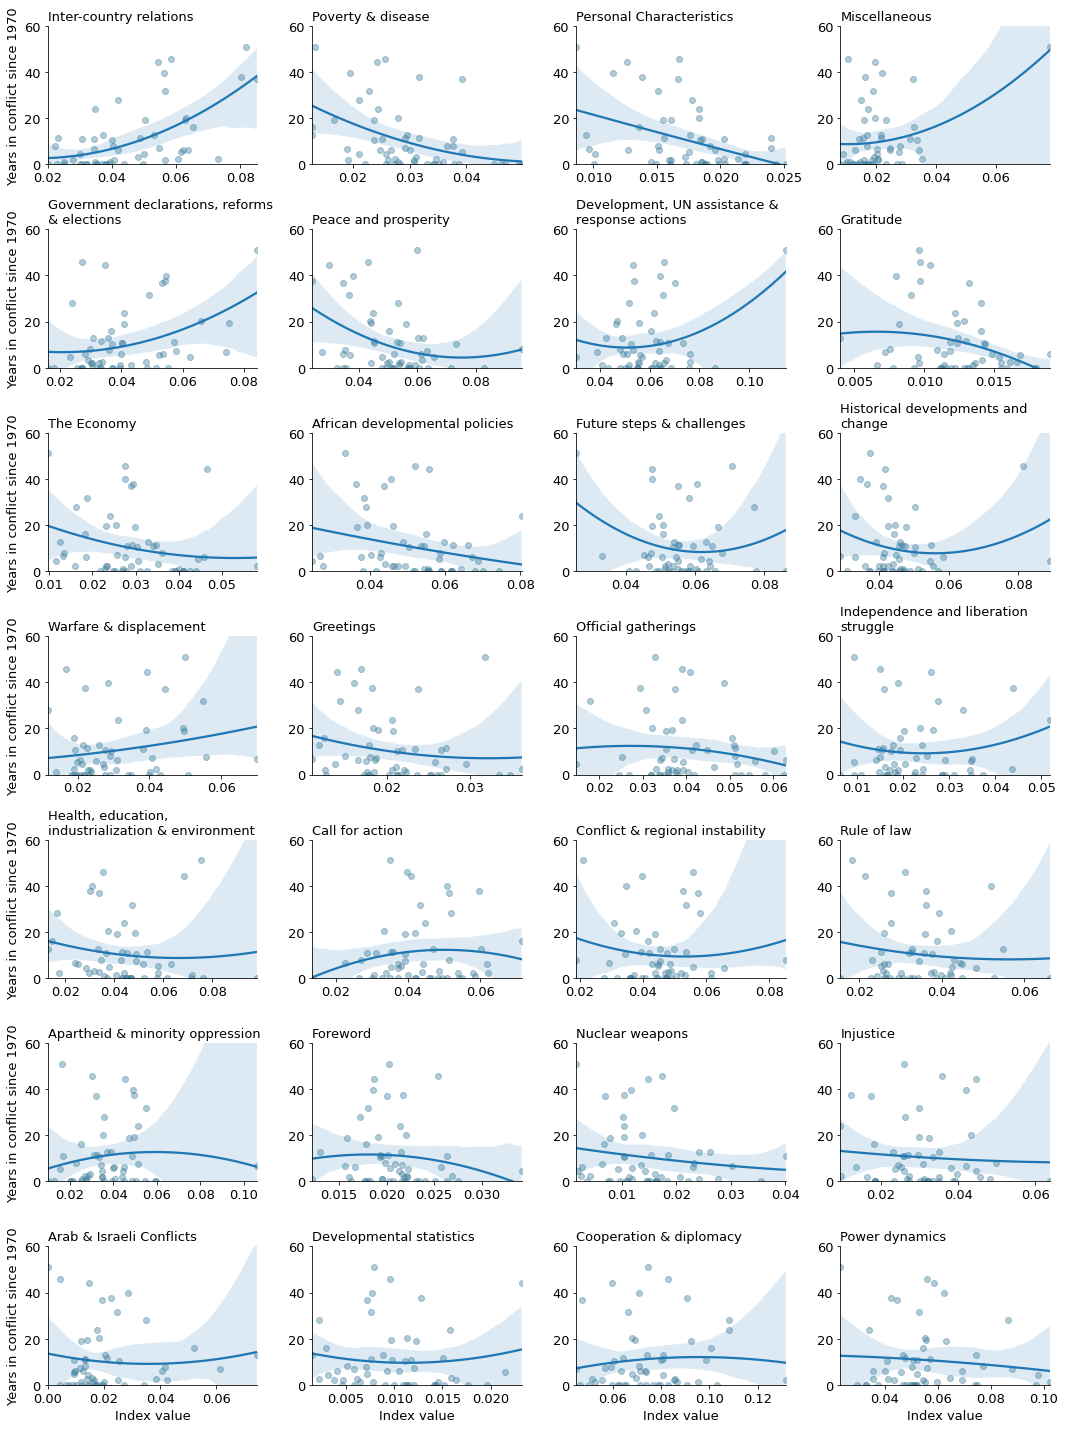

In [513]:
fig, axs = plt.subplots(7,4, figsize=(15,20))

years_at_war = 51

axs_list = axs.flatten()

for i, col in enumerate(rsqs):
    axs_list[i].scatter(grouped_data[col], grouped_data['years_at_war'], alpha=0.4, color=colorcodes[-1])
    sns.regplot(x=col, y='years_at_war', data=grouped_data, order=2, ax=axs_list[i], scatter=False)
    axs_list[i].set_title("\n".join(wrap(col, 32)), loc='left')
    
    if i % 4 == 0: axs_list[i].set_ylabel("Years in conflict since 1970")
    else: axs_list[i].set_ylabel("")
    
    if i >= 24: axs_list[i].set_xlabel("Index value")
    else: axs_list[i].set_xlabel("")
    
locs=['top', 'right']
for ax in axs_list: 
    for loc in locs: ax.spines[loc].set_visible(False)
    ax.set_ylim((0,70))
plt.tight_layout()
fig.savefig('./Figures/2021-07-30 war_index_agg.pdf')

### Temporal analysis

Can showcase only selected ones and how they changed (and the other ones color in grey)

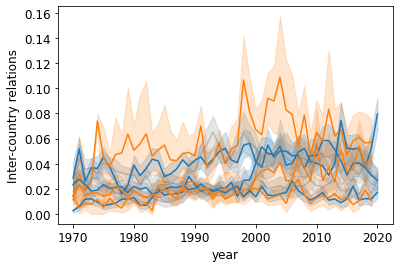

In [350]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

for col in list(rsqs.keys())[5:]:
    if col in ['Inter-country relations', 'Poverty & disease', 'Personal Characteristics']:
        sns.lineplot(x="year", y=col, data=new_df2, ax=ax, hue='is_war', legend=False) 
    else:
        sns.lineplot(x='year', y=col, data=new_df2, ax=ax, color='grey', alpha=0.4, ci=None, legend=False)

In [482]:
colorcodes = ['#C3553A', '#D79787', '#B6CBD6', '#407E9C']

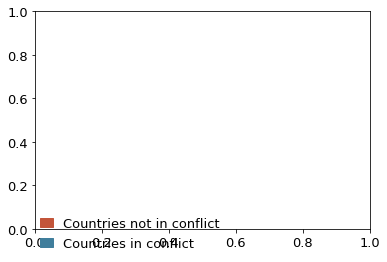

In [522]:
import matplotlib.patches as mpatches
normal_patch = plt.Rectangle((10, 0.75), 0.4, 0.15, color='#C3553A', label='Countries not in conflict')
normal_patch2 = plt.Rectangle((10, 0.75), 0.4, 0.15, color='#407E9C', label='Countries in conflict')

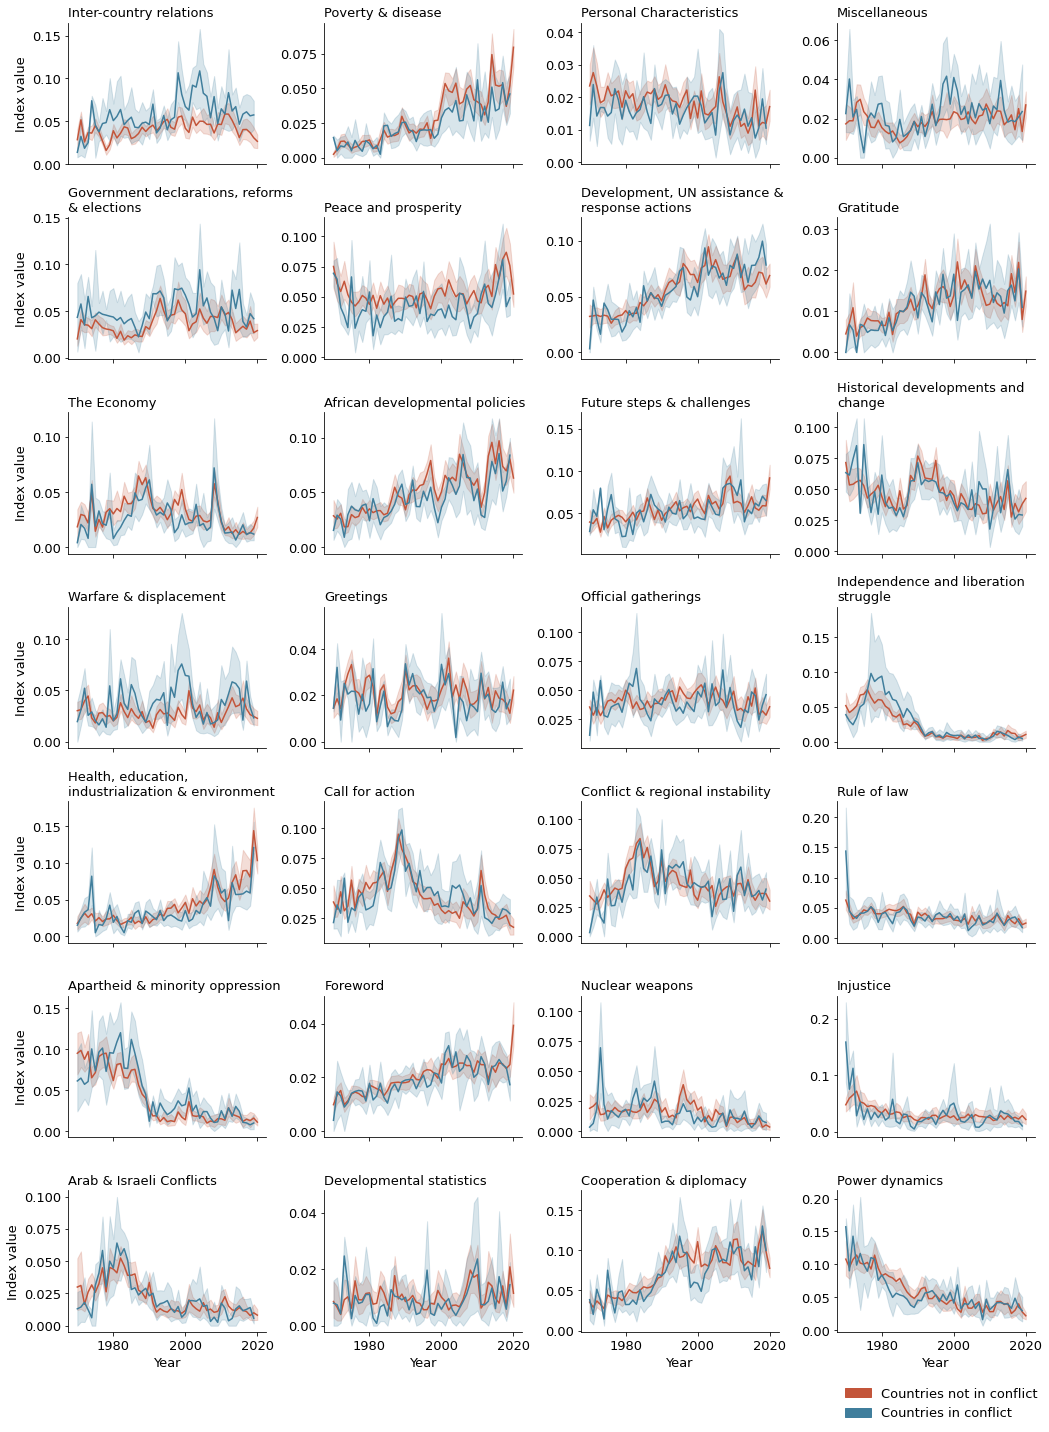

In [541]:
fig, axs = plt.subplots(7,4, figsize=(15,20), sharex=True)

axs_list = axs.flatten()

for i, col in enumerate(rsqs):
    sns.lineplot(x="year", y=col,
             data=new_df2, ax=axs_list[i],hue='is_war',palette=['#C3553A', '#407E9C'],legend=False)    
    axs_list[i].set_title("\n".join(wrap(col, 32)), loc='left')
    
    if i % 4 == 0: axs_list[i].set_ylabel("Index value")
    else: axs_list[i].set_ylabel("")
    
    if i >= 24: axs_list[i].set_xlabel("Year")
    else: axs_list[i].set_xlabel("")
    
plt.legend(handles=[normal_patch, normal_patch2], bbox_to_anchor=(-0.02, -0.7), loc='lower left', frameon=False,fontsize=13)

locs=['top', 'right']
for ax in axs_list: 
    for loc in locs: ax.spines[loc].set_visible(False)
        
plt.tight_layout()

fig.savefig('./Figures/2021-07-30 linear_trendline_all.pdf')

In [ ]:
import matplotlib.patches as mpatches
normal_patch = plt.Rectangle((10, 0.75), 0.4, 0.15, color='#3553A', label='')
normal_patch2 = plt.Rectangle((10, 0.75), 0.4, 0.15, color='#407E9C', label='Nu of posts')

plt.legend(handles=[normal_patch])

In [ ]:
fig, axs = plt.subplots(7,4, figsize=(15,20))

axs_list = axs.flatten()

for i, col in enumerate(rsqs):
    sns.lineplot(x="year", y=col,
             data=new_df2, ax=axs_list[i], hue='is_war', legend=False)    
    axs_list[i].set_title(col)
    axs_list[i].set_ylabel("")
    
plt.tight_layout()

#fig.savefig('./Figures/2021-07-30 linear_trendline_all.pdf')

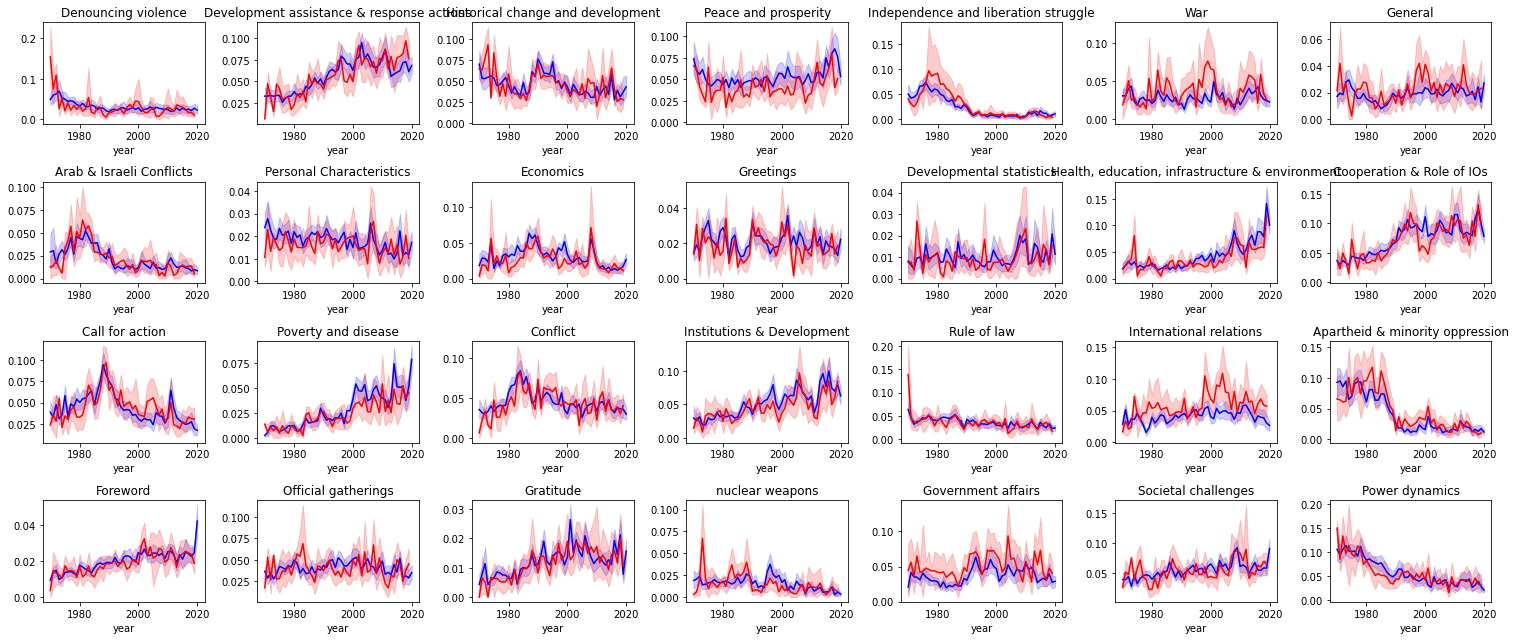

In [277]:
fig, axs = plt.subplots(4,7, figsize=(21,9))

axs_list = axs.flatten()

for i, col in enumerate(grouped_data.columns[4:]):
    sns.lineplot(x="year", y=col,
             data=new_df2[new_df2.is_war==0], ax=axs_list[i], color='blue')   
    
    sns.lineplot(x="year", y=col,
             data=new_df2[new_df2.is_war==1], ax=axs_list[i], color='red')   
    
    axs_list[i].set_title(col)
    axs_list[i].set_ylabel("")
    
plt.tight_layout()

Shaded area shows 95% confidence interval

## Testing index assumptions & stuff

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(tuning_lda, linewidth=12, ax=ax, cmap=cmap, annot=True)
ax.set_title("Coherence score C_v based on two parameters", loc='left')
ax.set_xlabel("LDA Beta Parameter")
ax.set_ylabel("LDA Alpha Parameter")

plt.tight_layout()

fig.savefig('./Figures/2021-07-20 LDA_coherence.pdf')

In [710]:
corr_df = ssa_df[usenames].corr()

In [711]:
cmap = sns.diverging_palette(20,230, as_cmap=True)

In [712]:
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

Almost independent except for 0.6 colinearity between apartheid & minority opression and independence and liberation struggle. This makes sense, since both topics are somewhat related

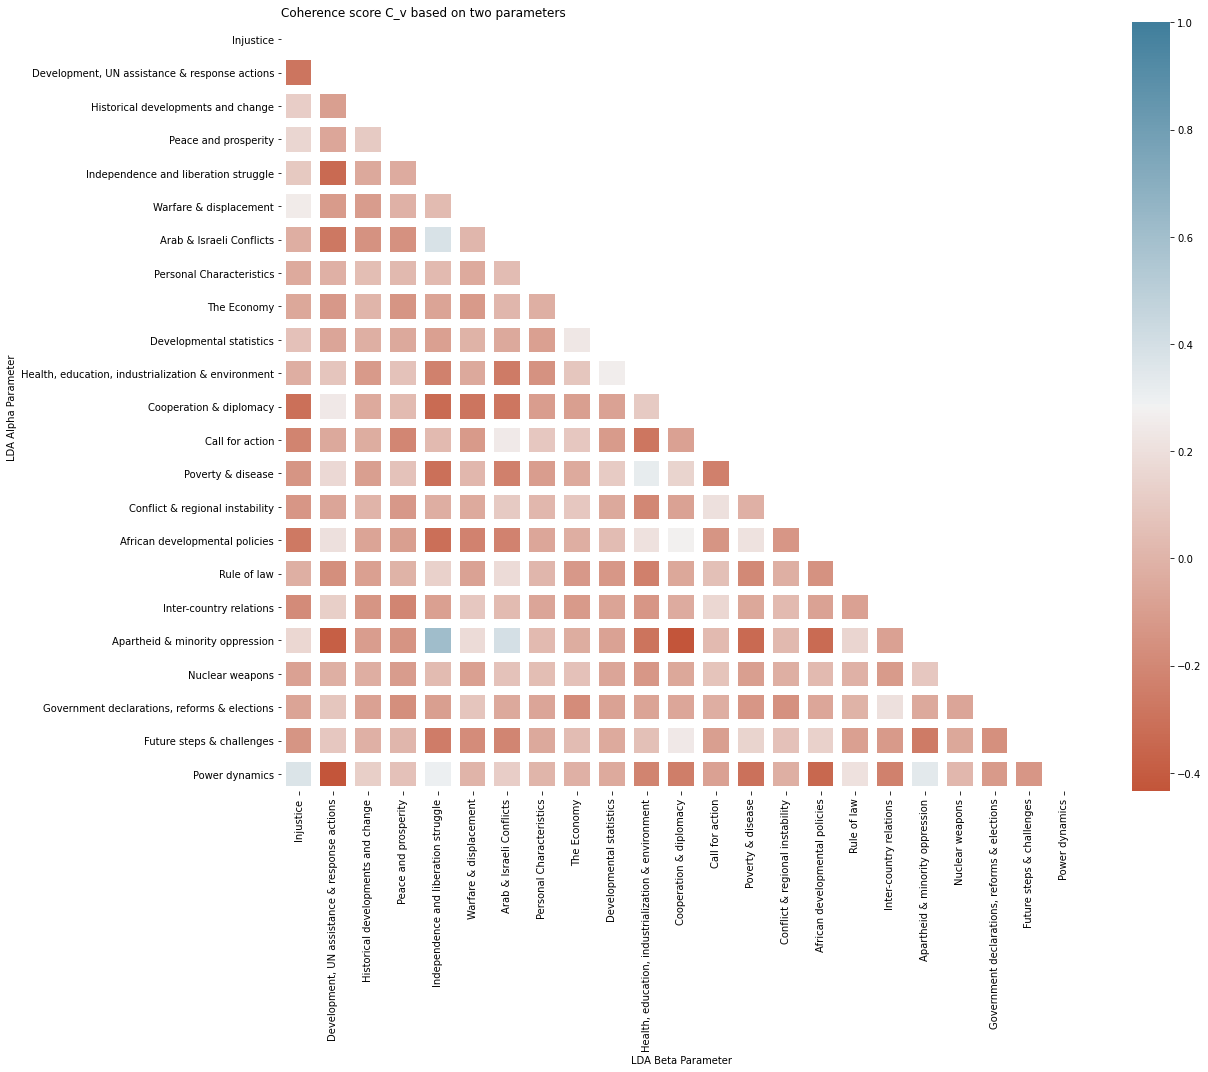

In [713]:
fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(corr_df, linewidth=8, ax=ax, cmap=cmap, mask=mask, annot=False, vmax=1)
ax.set_title("Coherence score C_v based on two parameters", loc='left')
ax.set_xlabel("LDA Beta Parameter")
ax.set_ylabel("LDA Alpha Parameter")

plt.tight_layout()

#fig.savefig('./Figures/2021-07-20 LDA_coherence.pdf')

### Trying index transformations - sqrt

<AxesSubplot:>

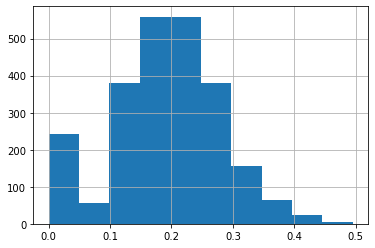

In [735]:
index_df[usenames]['Inter-country relations'].map(lambda x: np.sqrt(x)).hist()

<AxesSubplot:>

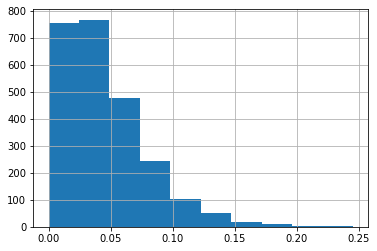

In [736]:
index_df[usenames]['Inter-country relations'].map(lambda x:x).hist()

## Checking colinearity amongst all variables

In [849]:
newcols
usenames

['Injustice',
 'Development, UN assistance & response actions',
 'Historical developments and change',
 'Peace and prosperity',
 'Independence and liberation struggle',
 'Warfare & displacement',
 'Arab & Israeli Conflicts',
 'Personal Characteristics',
 'The Economy',
 'Developmental statistics',
 'Health, education, industrialization & environment',
 'Cooperation & diplomacy',
 'Call for action',
 'Poverty & disease',
 'Conflict & regional instability',
 'African developmental policies',
 'Rule of law',
 'Inter-country relations',
 'Apartheid & minority oppression',
 'Nuclear weapons',
 'Government declarations, reforms & elections',
 'Future steps & challenges',
 'Power dynamics']

Relationship between controls and indices

## Exporting indices

In [904]:
new_df.head()

,year,country,is_war,n_conflicts,total_deaths,incompatibility,intensity,type_of_conflict,conflict_before,countryname,...,Rule of law,Inter-country relations,Apartheid & minority oppression,Foreword,Official gatherings,Gratitude,Nuclear weapons,"Government declarations, reforms & elections",Future steps & challenges,Power dynamics
0,1970,CMR,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,Cameroon,...,0.084507,0.000000,0.028169,0.014085,0.056338,0.000000,0.000000,0.014085,0.056338,0.140845
1,1971,CMR,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,Cameroon,...,0.054945,0.021978,0.065934,0.021978,0.032967,0.010989,0.021978,0.010989,0.021978,0.098901
2,1972,CMR,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,Cameroon,...,0.019608,0.019608,0.137255,0.019608,0.049020,0.000000,0.000000,0.019608,0.049020,0.058824
3,1974,CMR,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,Cameroon,...,0.011494,0.068966,0.045977,0.011494,0.045977,0.011494,0.000000,0.011494,0.057471,0.011494
4,1975,CMR,False,0,0.0,No incompatibility,No conflict,No conflict,No conflict,Cameroon,...,0.068376,0.042735,0.059829,0.008547,0.025641,0.025641,0.051282,0.017094,0.042735,0.119658


In [228]:
additional_cols = ['year', 'countryname', 'intrastate_conflict', 'interstate_conflict']
export_cols = usenames + additional_cols

In [229]:
map_indices = {'T' + str(k):v for k, v in zip(list(range(1,len(usenames)+1)), usenames)}

In [367]:
map_indices_df = pd.DataFrame(map_indices.items()).set_index(0)
map_indices_df.rename(index={0: 'Abbreviation'}, inplace=True)
map_indices_df.columns = ['Variable name']

In [363]:
print(map_indices_df.to_latex())

\begin{tabular}{ll}
\toprule
{} &                                      Variable name \\
0   &                                                    \\
\midrule
T1  &                                          Injustice \\
T2  &      Development, UN assistance \& response actions \\
T3  &                 Historical developments and change \\
T4  &                               Peace and prosperity \\
T5  &               Independence and liberation struggle \\
T6  &                             Warfare \& displacement \\
T7  &                           Arab \& Israeli Conflicts \\
T8  &                           Personal Characteristics \\
T9  &                                        The Economy \\
T10 &                           Developmental statistics \\
T11 &  Health, education, industrialization \& environ... \\
T12 &                            Cooperation \& diplomacy \\
T13 &                                    Call for action \\
T14 &                                  Poverty \& disease 

In [252]:
map_indices_rev = {v:k for k,v in map_indices.items()}

In [253]:
all_cols_map = list(map_indices) + additional_cols

In [232]:
export_df = new_df[export_cols]

In [234]:
export_df.columns = all_cols_map

In [989]:
export_df.to_csv("./Datasets/2021-07-24 indices_reg.csv", index=False)

In [259]:
df_export_ssa = ssa_dfna.copy()
df_export_ssa.columns = [map_indices_rev.get(x, x) for x in ssa_dfna.columns]
df_export_ssa = df_export_ssa[[x for x in df_export_ssa.columns if x not in notuse_names]]

In [262]:
rm = ['Population', 'Country', 'Year', 'intensity', 'ForeignAid', 'GDP_capita']

In [265]:
df_export_ssa[[x for x in df_export_ssa.columns if x not in rm]].to_csv("./Datasets/2021-07-30 ful_reg.csv", index=False)

In [2]:
import pandas as pd

In [28]:
export_df = pd.read_csv('./Datasets/2021-07-24 indices_reg.csv')

In [29]:
len(export_df)

2426

In [30]:
export_df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T18,T19,T20,T21,T22,T23,year,countryname,intrastate_conflict,interstate_conflict
0,0.014085,0.028169,0.112676,0.140845,0.042254,0.014085,0.000000,0.014085,0.000000,0.000000,...,0.000000,0.028169,0.000000,0.014085,0.056338,0.140845,1970,Cameroon,0,0
1,0.109890,0.021978,0.153846,0.054945,0.043956,0.032967,0.000000,0.054945,0.000000,0.000000,...,0.021978,0.065934,0.021978,0.010989,0.021978,0.098901,1971,Cameroon,0,0
2,0.019608,0.029412,0.078431,0.107843,0.058824,0.029412,0.009804,0.049020,0.049020,0.000000,...,0.019608,0.137255,0.000000,0.019608,0.049020,0.058824,1972,Cameroon,0,0
3,0.011494,0.091954,0.045977,0.057471,0.091954,0.022989,0.011494,0.011494,0.114943,0.034483,...,0.068966,0.045977,0.000000,0.011494,0.057471,0.011494,1974,Cameroon,0,0
4,0.034188,0.025641,0.059829,0.119658,0.085470,0.008547,0.008547,0.017094,0.008547,0.000000,...,0.042735,0.059829,0.051282,0.017094,0.042735,0.119658,1975,Cameroon,0,0


In [13]:
df = pd.read_csv("./Datasets/2021-07-30 ful_reg.csv")

In [26]:
len(df)

1638

In [31]:
1638 / 2426

0.6751854905193735

In [990]:
from sklearn.preprocessing import MinMaxScaler

In [991]:
scaler = MinMaxScaler()

In [992]:
transf_df = pd.DataFrame(scaler.fit_transform(export_df[map_indices]), columns=map_indices)

In [993]:
export_df_standard = transf_df.merge(export_df[additional_cols], left_index=True, right_index=True)
export_df_standard.to_csv("./Datasets/2021-07-24 indices_reg_stand.csv")

In [994]:
' + '.join(map_indices.keys())

'T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12 + T13 + T14 + T15 + T16 + T17 + T18 + T19 + T20 + T21 + T22 + T23'

<AxesSubplot:>

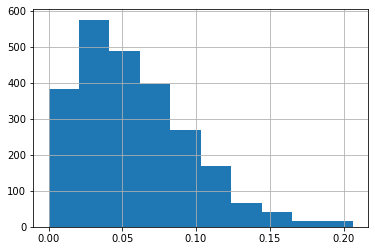

In [995]:
export_df['T2'].hist()

In [997]:
cols_ssa_export = newcols + ['Country', 'Year']

In [1004]:
ssa_dfna[cols_ssa_export].merge(export_df_standard, left_on=['Country', 'Year'], right_on=['countryname','year']).to_csv("./Datasets/2021-07-24 standardized_w_controls.csv")

In [1024]:
indices = pd.read_excel("./Datasets/2021-07-25 topic_model_results.xlsx")

In [1025]:
indices = indices.round(3)

In [1028]:
print(indices.to_latex(multirow=True, index=False, escape=True))

\begin{tabular}{llrrrrrr}
\toprule
                                          Model &                                Baseline references &   NPMI &  U\_Mass &   U\_ci &   C\_v &  Intra-cosine similarity &  Silhouette score \\
\midrule
         Fine-tuned Latent Dirichlet Allocation &    Blei et al. (2003)\textbackslash \textbackslash  Hoffman, Bach, Blei (2010) & -0.039 &  -0.660 & -1.193 & 0.312 &                      NaN &               NaN \\
     Fine-tuned Hierarchical Dirichlet Process* &                       Wang, Paisley, \& Blei (2011) & -0.103 &  -6.555 & -2.697 & 0.399 &                      NaN &               NaN \\
                       Latent Semantic Analysis &                      Dumais (2004); Rehurek (2011) & -0.009 &  -0.389 & -0.163 & 0.293 &                      NaN &               NaN \\
          Trained Fasttext \& Clustering [words] &        Sia et al. (2020); Bojanowski et al. (2017) &  0.038 &  -0.536 &  0.216 & 0.462 &                    0.333 &          

## Evaluating topic model

In [3]:
import json

In [9]:
with open('./Datasets/2021-07-13 results_sentence_clustering.json') as f:
    kmeans = json.loads(f.read())
kmeans_df = pd.DataFrame(kmeans).transpose()
cols = kmeans_df.columns[1:]


In [10]:
kmeans_df = kmeans_df[cols]

In [11]:
kmeans_df = kmeans_df[np.array([float(x) for x in kmeans_df.index])<=45]

In [12]:
x = np.array([float(x) for x in kmeans_df.index])

In [ ]:
colorcodes = ['#C3553A', '#D79787', '#B6CBD6', '#407E9C']


In [100]:
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor=colorcodes[-2], alpha=0.5)

textstr = '$K=28$\nIntra-cosine: $0.702$'

In [101]:
import matplotlib

In [102]:
fsize=13
matplotlib.rcParams.update({'font.size': fsize})


In [148]:
kmeans_df.head()

,m_cosine_avg,m_silhouette,umass,uci,npmi,inertia
15,0.676494,0.029945,-2.984144,0.887275,0.144990,71810.397389
16,0.676582,0.032909,-2.702111,1.166007,0.160510,71468.314260
17,0.678003,0.028582,-2.834419,0.913370,0.135330,71046.138089
18,0.679591,0.030208,-2.918790,1.072106,0.156599,70663.903837
19,0.689355,0.030812,-2.850560,1.161170,0.172479,70305.426835


In [183]:
def get_circle(colname, ax):
    pad=0.3
    xcircle = 28
    ycircle = kmeans_df.loc['28', colname]
    ax.annotate(" ", xy=(xcircle,ycircle),  fontsize=10, color='white', ha='center',
                bbox={'boxstyle': 'circle', 'pad': pad, 'facecolor': colorcodes[1], 'edgecolor': 'black', 'alpha':0.8})


In [184]:
def plot_cos(ax):
    matplotlib.rcParams.update({'font.size': fsize})
    textstr = '$K=28$\nIntra-cosine: $0.702$'
    colname='m_cosine_avg'
    ax.plot(x, kmeans_df[colname])
    ax.fill_between(list(x), list(kmeans_df[colname]), color='grey', alpha=0.3)
    ax.set_ylim(0.675, 0.715)
    ax.set_title("Average intra-group cosine similarity", loc='left', fontsize=fsize)

    locs=['top', 'right', 'left']
    for loc in locs: ax.spines[loc].set_visible(False)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.90, textstr, transform=ax.transAxes, fontsize=fsize,
            verticalalignment='top', bbox=props)

    ax.set_ylabel("Average Intra-group cosine similarity")
    ax.set_xlabel("Number of clusters")

    # Set circle
    get_circle(colname, ax)

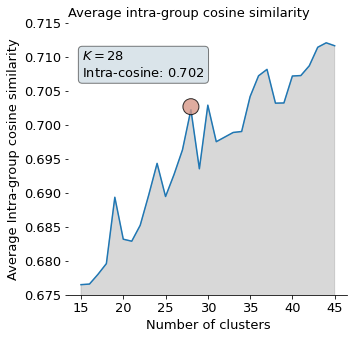

In [185]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_cos(ax)

In [186]:
def plot_silhouette(ax):
    matplotlib.rcParams.update({'font.size': fsize})

    textstr = '$K=28$\nSilhouette: $0.029$'
    colname = 'm_silhouette'

    ax.plot(x, kmeans_df[colname])
    ax.fill_between(list(x), list(kmeans_df[colname]), color='grey', alpha=0.3)
    ax.set_ylim(0.026, 0.033)
    ax.set_title("Silhouette score", loc='left', fontsize=fsize)

    locs=['top', 'right', 'left']
    for loc in locs: ax.spines[loc].set_visible(False)

    # place a text box in upper left in axes coords
    ax.text(0.15, 0.90, textstr, transform=ax.transAxes, fontsize=fsize,
            verticalalignment='top', bbox=props)

    ax.set_ylabel("Silhouette Score")
    ax.set_xlabel("Number of clusters")
    get_circle(colname, ax)

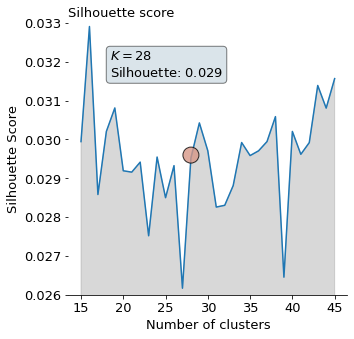

In [187]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_silhouette(ax)

In [188]:
def plot_npmi(ax):
    matplotlib.rcParams.update({'font.size': fsize})

    textstr = '$K=28$\nNPMI: $0.171$'
    colname = 'npmi'

    ax.plot(x, kmeans_df[colname])
    ax.fill_between(list(x), list(kmeans_df[colname]), color='grey', alpha=0.3)
    ax.set_ylim(0.11, 0.22)
    ax.set_title("Negative Pointwise Mutual Information", loc='left', fontsize=fsize)

    locs=['top', 'right', 'left']
    for loc in locs: ax.spines[loc].set_visible(False)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.90, textstr, transform=ax.transAxes, fontsize=fsize,
            verticalalignment='top', bbox=props)

    ax.set_ylabel("Intra-group cosine similarity")
    ax.set_xlabel("Number of clusters")

    get_circle(colname, ax)

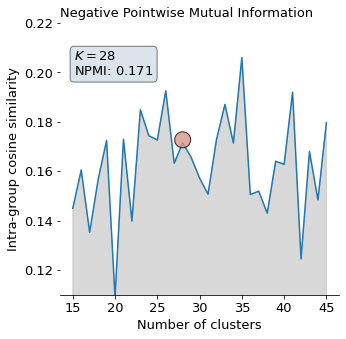

In [189]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_npmi(ax)

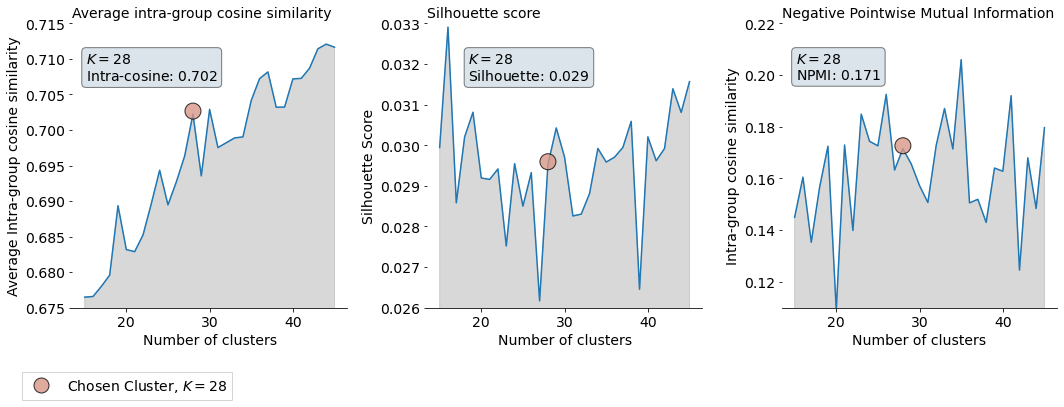

In [272]:
fig, axs = plt.subplots(1,3, figsize=(15,6))

fsize=14
plot_cos(axs[0])
plot_silhouette(axs[1])
plot_npmi(axs[2])

# Create a legend
custom_line = Line2D([0], [0], color=colorcodes[1], alpha=0.8, marker='o', linestyle='', lw=0, markeredgewidth=1, markeredgecolor='black', markersize=15, label = 'Chosen Cluster, $K=28$')

axs[0].legend(handles=[custom_line], frameon=True, loc='upper center', 
             bbox_to_anchor=(0.2, -0.2),fancybox=False, shadow=False, ncol=3)
plt.tight_layout()

fig.savefig('./Figures/clustering_scores.pdf')

In [273]:
kmeans_df

,m_cosine_avg,m_silhouette,umass,uci,npmi,inertia
15,0.676494,0.029945,-2.984144,0.887275,0.144990,71810.397389
16,0.676582,0.032909,-2.702111,1.166007,0.160510,71468.314260
17,0.678003,0.028582,-2.834419,0.913370,0.135330,71046.138089
18,0.679591,0.030208,-2.918790,1.072106,0.156599,70663.903837
19,0.689355,0.030812,-2.850560,1.161170,0.172479,70305.426835
20,0.683184,0.029194,-3.421919,0.356190,0.109023,69942.266842
21,0.682888,0.029159,-2.913564,1.288962,0.172954,69618.546498
22,0.685227,0.029417,-3.039531,0.772221,0.139881,69335.726285
23,0.689649,0.027520,-2.768910,1.156299,0.184898,69027.776633
24,0.694342,0.029548,-2.815107,1.251680,0.174386,68740.946625


In [196]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [23]:
kmeans_df

,m_cosine_avg,m_silhouette,umass,uci,npmi,inertia
15,0.676494,0.029945,-2.984144,0.887275,0.14499,71810.397389
16,0.676582,0.032909,-2.702111,1.166007,0.16051,71468.31426
17,0.678003,0.028582,-2.834419,0.91337,0.13533,71046.138089
18,0.679591,0.030208,-2.91879,1.072106,0.156599,70663.903837
19,0.689355,0.030812,-2.85056,1.16117,0.172479,70305.426835
...,...,...,...,...,...,...
72,0.721259,0.024986,-4.766604,-0.17836,0.117816,61174.082118
73,0.724564,0.024964,-4.251877,-0.062606,0.113182,61121.145956
74,0.723084,0.021951,-4.612005,-0.193261,0.109324,61009.231352
75,0.725118,0.025972,NaN,NaN,NaN,60960.471159


In [91]:
preds = pd.read_csv("./Datasets/2021-07-30 predictions.csv")
preds.columns = ['index', 'pred']

In [5]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [6]:
indices_df = pd.read_csv('./Datasets/2021-07-24 indices_reg.csv')

In [7]:
reals = indices_df.intrastate_conflict.tolist()

In [8]:
preds = pd.read_csv("./Datasets/2021-07-30 predictions.csv")
preds.columns = ['index', 'pred']

In [13]:
reals_na = ssa_dfna.intrastate_conflict.tolist()

In [15]:
for d in ['controls', 'indices', 'indices_controls']:
    print(d)
    preds = pd.read_csv(f"./Datasets/2021-07-31 {d}.csv")
    preds.columns = ['index', 'pred']
    
    preds = preds['pred'].tolist()
    preds_binary = [int(x>=0.5) for x in preds]
    for name, fn in zip(["F1", "Precision", "Recall", "Accuracy"], [f1_score, precision_score, recall_score, accuracy_score]):
        print(name, fn(reals_na, preds_binary))

controls
F1 0.6603415559772295
Precision 0.7767857142857143
Recall 0.5742574257425742
Accuracy 0.8907203907203908
indices
F1 0.6593001841620626
Precision 0.7458333333333333
Recall 0.5907590759075908
Accuracy 0.887057387057387
indices_controls
F1 0.6802218114602587
Precision 0.773109243697479
Recall 0.6072607260726073
Accuracy 0.8943833943833944


In [105]:
preds = preds['pred'].tolist()

In [107]:
preds_binary = [int(x>=0.5) for x in preds]

Full dataset

In [118]:
for name, fn in zip(["F1", "Precision", "Recall", "Accuracy"], [f1_score, precision_score, recall_score, accuracy_score]):
    print(name, fn(reals, preds_binary))

F1 0.6188769414575866
Precision 0.7134986225895317
Recall 0.5464135021097046
Accuracy 0.8685078318219291


- AIC (Akaike)
- DIC 
- WAIC (Information Criterion or the Watan Abi Akaike Criteria)
- Loo-CV

## Lazy Predict

Linearity assumptions might not be satisfied even with transformations, and normalizations (i.e. quantile transforms) of conventional econometric models

In [421]:
import pandas as pd

In [422]:
re = pd.read_excel("./Datasets/2021-08-08 randomeffects.xlsx")

In [425]:
print(re.to_latex(index=False))

\begin{tabular}{llrr}
\toprule
     Groups &        Name &  Variance &  Std.Dev. \\
\midrule
     person & (Intercept) &     66.11 &      8.13 \\
countryname & (Intercept) &      1.99 &      1.41 \\
       year & (Intercept) &      0.03 &      0.18 \\
\bottomrule
\end{tabular}

